# **Problem Statement 1:**
**A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply.**


In [ ]:
#Lets import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading Dataset
df = pd.read_csv('/content/Walmart.csv')

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


# **Dataset Information:**
**The walmart.csv contains 6435 rows and 8 columns.**

# **EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# **Inferences:**
**The date column is currently of object type. Let's convert it to datetime format for better insights.**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
df.duplicated().sum()

0

# **Inferences:**
**There are no null & duplicated values in the dataset.**

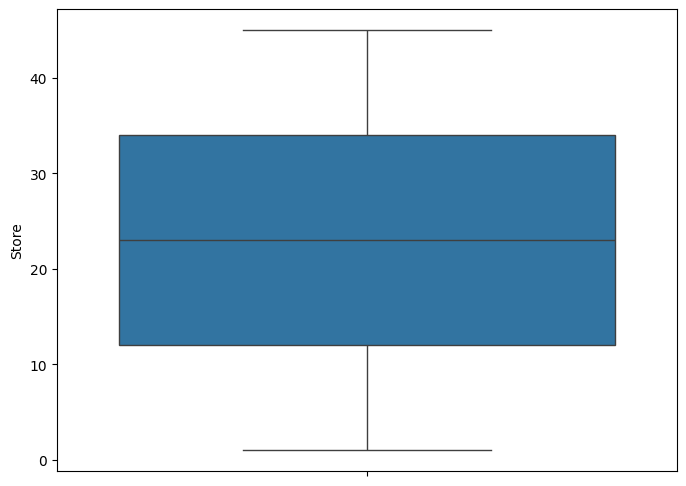

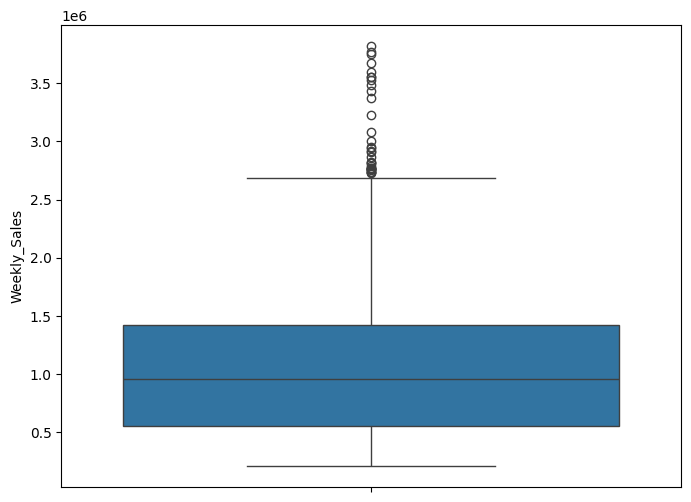

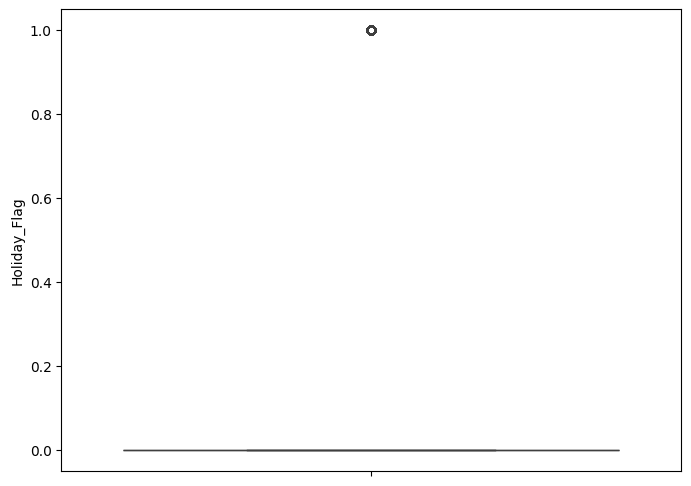

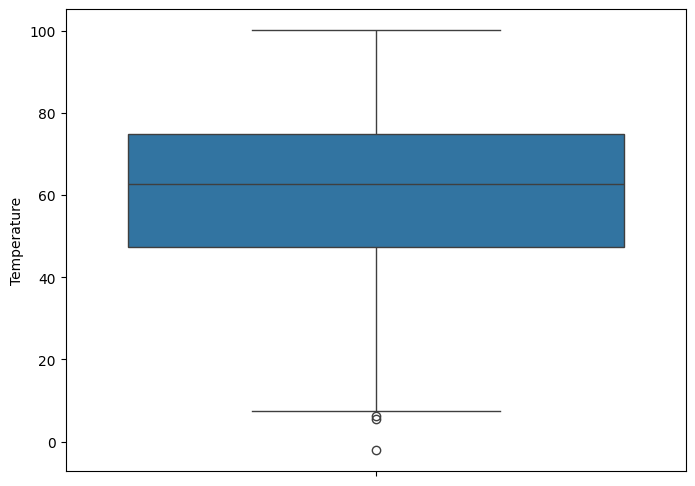

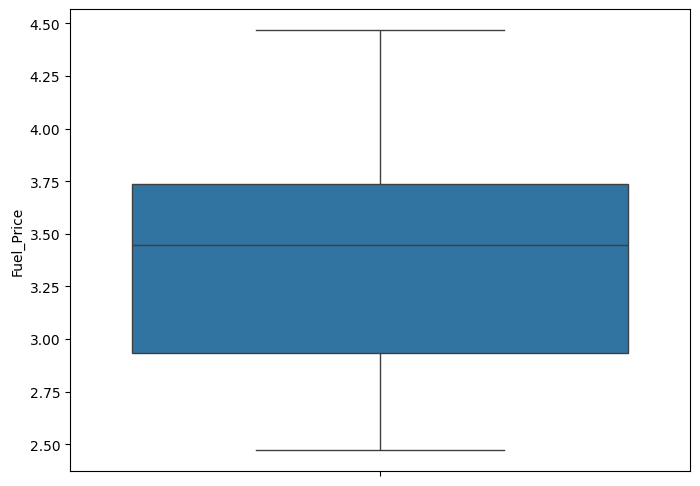

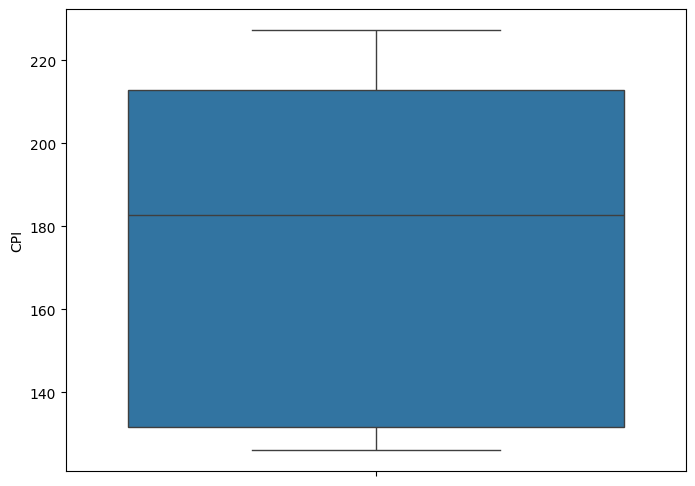

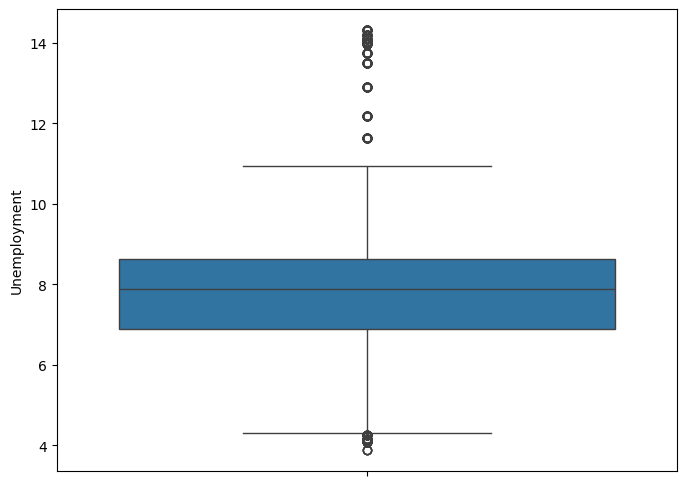

In [ ]:
#outliers
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        plt.figure(figsize=(8, 6))
        sns.boxplot(df[col])

# **Inferences:**
**As we have some outliers in the dataset, let's perform a 5-number summary.**

In [ ]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [ ]:
df['Holiday_Flag'].value_counts()

,count
Holiday_Flag,
0,5985
1,450


In [ ]:
out_cols = ['Store', 'Date', 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment']

In [ ]:
# Removing Outliers
for col in out_cols:
  if df[col].dtype == 'int64' or df[col].dtype == 'float64':
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5917 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         5917 non-null   int64         
 1   Date          5917 non-null   datetime64[ns]
 2   Weekly_Sales  5917 non-null   float64       
 3   Holiday_Flag  5917 non-null   int64         
 4   Temperature   5917 non-null   float64       
 5   Fuel_Price    5917 non-null   float64       
 6   CPI           5917 non-null   float64       
 7   Unemployment  5917 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 416.0 KB


## **a) If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most.**

In [ ]:
df['Unemployment'].value_counts()

,count
Unemployment,
8.099,78
7.852,56
8.163,55
6.565,52
8.200,52
...,...
7.543,4
6.895,4
5.847,4


# **Inferences:**
We have a lot of values in the unemployment column, which will affect our visualization. So, let's create a range of values.

In [ ]:
df['Unemployment'].min()

4.308

In [ ]:
df['Unemployment'].max()

10.926

In [ ]:
# Creating the bins and labels to store the values
bin=[4,6,8,10,12]
label_cat=['4-6','6.1-8','8.1-10','10.1-12']

In [ ]:
# creating the new column in the dataframe
df['Unemployment_Cat']= pd.cut(df['Unemployment'],bins=bin,labels=label_cat)

In [ ]:
df['Unemployment_Cat'].value_counts()

,count
Unemployment_Cat,
6.1-8,2772
8.1-10,2379
4-6,515
10.1-12,251


In [ ]:
# Creating separte dataframe for the sales and UnEmp rate
UnEmp_Sales = df.groupby('Unemployment_Cat')['Weekly_Sales'].sum().reset_index()

<ipython-input-21-14edaa5f6108>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  UnEmp_Sales = df.groupby('Unemployment_Cat')['Weekly_Sales'].sum().reset_index()


In [ ]:
UnEmp_Sales

,Unemployment_Cat,Weekly_Sales
0,4-6,5.858215e+08
1,6.1-8,2.913154e+09
2,8.1-10,2.464966e+09
3,10.1-12,1.856744e+08


<Axes: xlabel='Unemployment_Cat', ylabel='Weekly_Sales'>

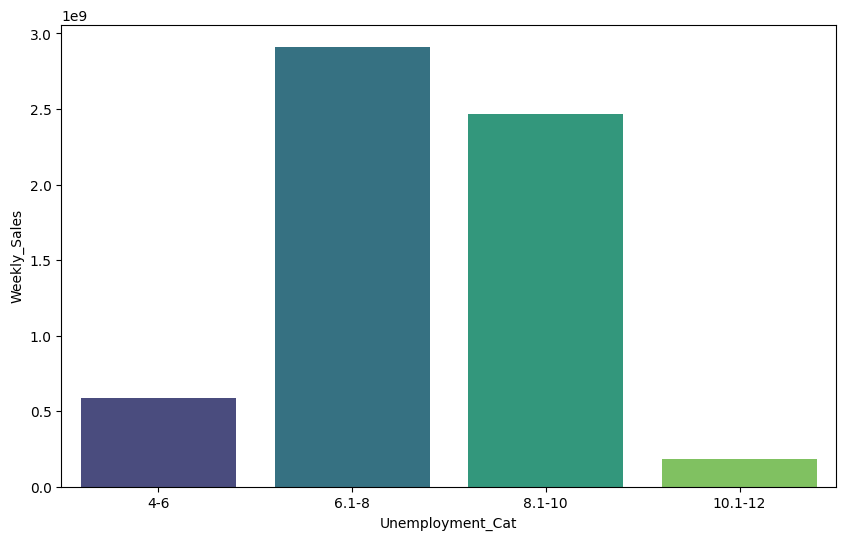

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Unemployment_Cat',y='Weekly_Sales',data=UnEmp_Sales,hue='Unemployment_Cat',palette='viridis',legend=False)

## **Inference**
- **When the Unemployment rate is between the 6 to 10 the stores are going well**
- **Unemployment rate is increasing the sales went down**

In [ ]:
# Lets do label encoding
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df['Unemployment_Cat'] = le.fit_transform(df['Unemployment_Cat'])

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Unemployment_Cat
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,3
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,3
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,3
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,3
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,3
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,3
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,3
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,3


In [ ]:
filtered_df = df[df['Unemployment_Cat'].isin([1, 0])] # Filtering data with lowest weekly sales groups

In [ ]:
filtered_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Unemployment_Cat
489,4,2011-04-01,1900246.47,0,56.99,3.521,128.719935,5.946,1
490,4,2011-04-08,2074953.46,0,62.61,3.605,128.823806,5.946,1
491,4,2011-04-15,1960587.76,0,62.34,3.724,128.910733,5.946,1
492,4,2011-04-22,2220600.76,0,68.80,3.781,128.955300,5.946,1
493,4,2011-04-29,1878167.44,0,64.22,3.781,128.999867,5.946,1
...,...,...,...,...,...,...,...,...,...
6287,44,2012-09-28,355307.94,0,64.80,3.821,131.043000,5.407,1
6288,44,2012-10-05,337390.44,0,61.79,3.815,131.075667,5.217,1
6289,44,2012-10-12,337796.13,0,55.10,3.797,131.108333,5.217,1
6290,44,2012-10-19,323766.77,0,52.06,3.781,131.149968,5.217,1


In [ ]:
sal_unemp_str= filtered_df.groupby('Store')['Weekly_Sales'].sum().reset_index() #Grouping sum of weekly sales with respect to each  store in store columns

In [ ]:
sal_unemp_str.sort_values(by='Weekly_Sales',ascending=True,inplace=True) #sorting values to get store with lowest sales at top.

In [ ]:
sal_unemp_str.head()

,Store,Weekly_Sales
7,16,2016067.98
12,33,2299155.24
14,38,7347378.89
1,5,14168838.13
17,44,14187373.72


#**Question a) - Inference**
## ***Store no. 7,12,14,1 & 17 are suffering the most.***

# **b). If the weekly sales show a seasonal trend, when and what could be the reason?**

**According to the dataset, we have a total of two columns that can provide us with seasonal or trend insights.**


*   Date
*   Temperature



In [ ]:
# we will use seasonal decompose tool to visualize trends, seasionality & cyclic behaviour
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
#weekly sales
sales_date = df.groupby('Date')['Weekly_Sales'].sum().reset_index() # Grouping   sum(weekly sales)  data with respect to date.
sales_date.set_index('Date',inplace=True)
sales_decom = seasonal_decompose(sales_date['Weekly_Sales'],period=13,model='additive') #Quaterly seasional pattern approx 13 weeks in 3 month

Figure(1200x600)


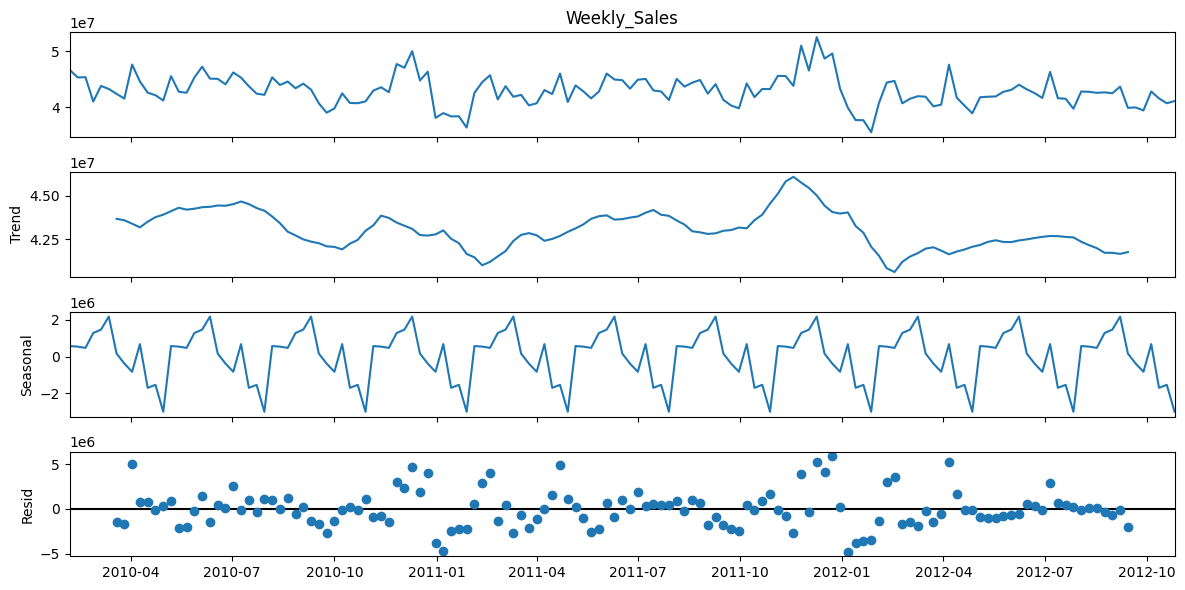

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
print(sales_decom.plot())
plt.show()

In [ ]:
temp_df = df.groupby('Date')['Temperature'].sum().reset_index()
temp_df.set_index('Date',inplace=True)
temp_decom = seasonal_decompose(temp_df['Temperature'],period=13,model='additive')

Figure(1200x600)


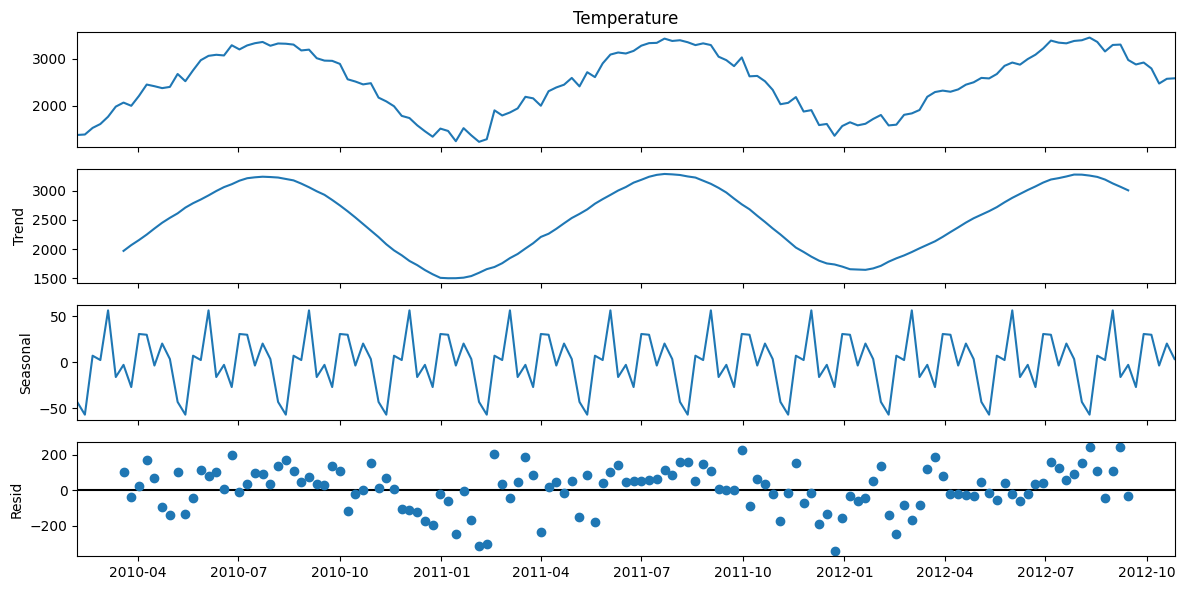

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
print(temp_decom.plot())
plt.show()

#**Question b) - Inference**
*  Examining the temperature data, we notice a seasonal decline beginning in
September 2010 and continuing until January 2011, followed by a gradual rise. This pattern repeats with another drop starting in September 2011.

*  In the weekly sales data, there's a significant increase in sales starting from September 2010, which continues with an upward trend until January 2011. After this period, sales stabilize before transitioning to a downward trend. This cycle repeats from September 2011 to January 2012.

*  Overall, there seems to be an inverse relationship between temperature and weekly sales. As temperatures decrease, weekly sales tend to rise, and vice versa. This inverse correlation is evident from September 2010 to January 2011, as well as from September 2011 to January 2012.





# **c). Does temperature affect the weekly sales in any manner?**

<Axes: >

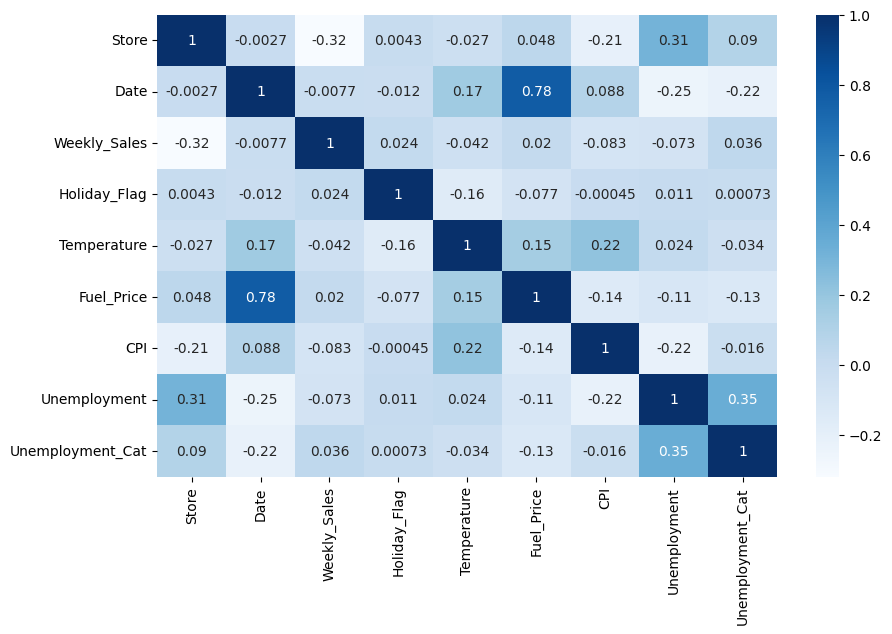

In [ ]:
#Let find out this using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

#**Question c) - Inference**
*  Yes,temperature affecting the weekly sales.
*  A temperature coefficient of -0.042 indicates a weak negative correlation
   with weekly sales. However, due to its small absolute value, temperature likely has a minimal impact on sales compared to other factors.

# **d). How is the Consumer Price index affecting the weekly sales of various stores?**

<Axes: xlabel='CPI', ylabel='Weekly_Sales'>

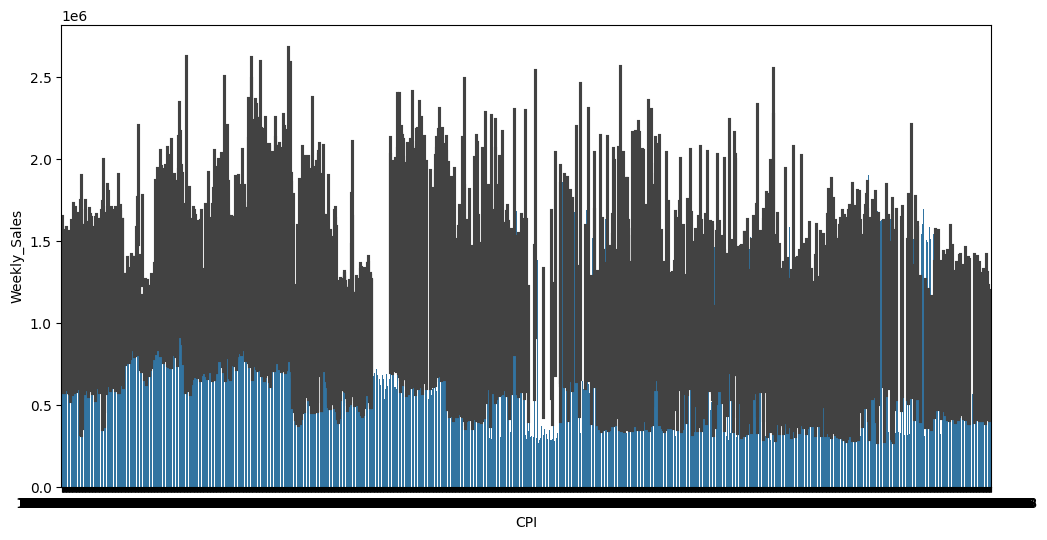

In [ ]:
#Lets check it using barplot
sns.barplot(x=df['CPI'],y=df['Weekly_Sales'])

In [ ]:
df['CPI'].min() # Checking the lowest value

126.064

In [ ]:
df['CPI'].max() # Checking the Highest value band of inflation

227.2328068

In [ ]:
#lets create bin for cpi for better visualization
bins2=[130,160,190,220,250] # Creating bins and labels for categorization of inflation rate
labels2=['130-160','161-190','191-220','221-250',]

In [ ]:
df['CPI_cat']= pd.cut(df['CPI'],bins=bins2,labels=labels2)

In [ ]:
df['CPI_cat'].value_counts()

,count
CPI_cat,
191-220,2358
130-160,1869
221-250,602
161-190,314


<ipython-input-45-01a54f00ce9a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['CPI_cat'],y=df['Weekly_Sales'],palette=my_palette)
<ipython-input-45-01a54f00ce9a>:2: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(x=df['CPI_cat'],y=df['Weekly_Sales'],palette=my_palette)


<Axes: xlabel='CPI_cat', ylabel='Weekly_Sales'>

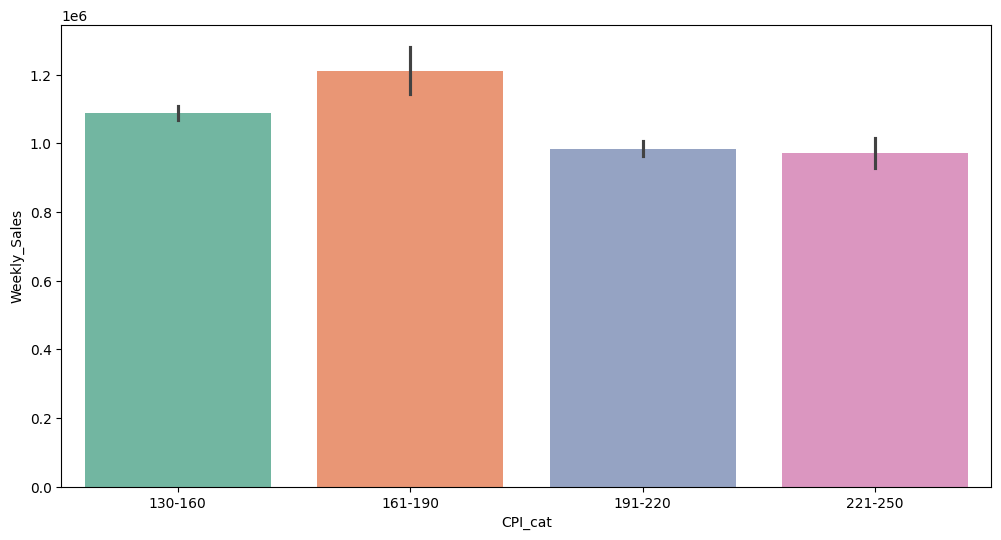

In [ ]:
my_palette = sns.color_palette('Set2')
sns.barplot(x=df['CPI_cat'],y=df['Weekly_Sales'],palette=my_palette)



#**Question d) - Inference**
* Based on the graph, we can observe that as the Consumer Price Index (CPI)
increases, weekly sales decrease.

* This demonstrates the impact of the CPI on the weekly sales of various stores.

# **e).Top performing stores according to the historical data.**

In [ ]:
# To check top performing store with respect to weekly sales
stores_sale = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

In [ ]:
stores_sale

,Store,Weekly_Sales
0,1,2.224028e+08
1,2,2.687221e+08
2,3,5.758674e+07
3,4,2.446487e+08
4,5,4.547569e+07
5,6,2.210286e+08
6,7,8.104025e+07
7,8,1.299512e+08
8,9,7.778922e+07
9,10,2.556789e+08


In [ ]:
#now lets sort values to get top 8 store with highest sales
top_store = stores_sale.sort_values(by='Weekly_Sales',ascending=False).head(8)

In [ ]:
top_store

,Store,Weekly_Sales
19,20,2.800237e+08
13,14,2.761276e+08
1,2,2.687221e+08
12,13,2.682025e+08
9,10,2.556789e+08
26,27,2.480387e+08
3,4,2.446487e+08
0,1,2.224028e+08


<ipython-input-50-ec5acc794863>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_store['Store'],y=top_store['Weekly_Sales'],palette=my_palette)
<ipython-input-50-ec5acc794863>:4: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_store['Store'],y=top_store['Weekly_Sales'],palette=my_palette)


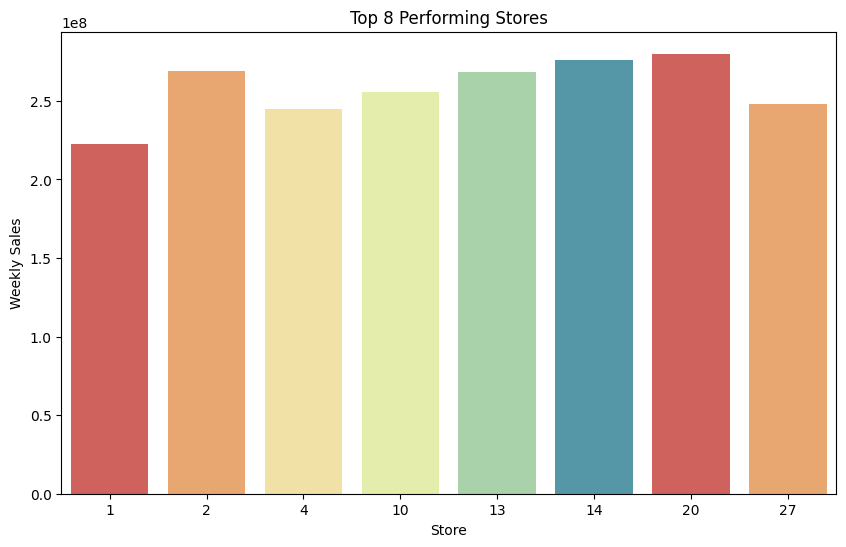

In [ ]:
#lets plot it
plt.figure(figsize=(10,6))
my_palette=sns.color_palette('Spectral')
sns.barplot(x=top_store['Store'],y=top_store['Weekly_Sales'],palette=my_palette)
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Top 8 Performing Stores')
plt.show()


#**Question e) - Inference**


*   **So the top performing stores are 1,2,4,10,13,14,20,27**
*   Where 1 is having lowest sales in this top segment  group.



# **f). The worst performing store, and how significant is the difference between the highest and lowest performing stores.**

In [ ]:
#Top 8 worst performing stores
bottom_store = stores_sale.sort_values(by='Weekly_Sales',ascending=True).head(8)

<ipython-input-52-48a9c09440d8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_store['Store'],y=bottom_store['Weekly_Sales'],palette=my_palette)
<ipython-input-52-48a9c09440d8>:4: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=bottom_store['Store'],y=bottom_store['Weekly_Sales'],palette=my_palette)


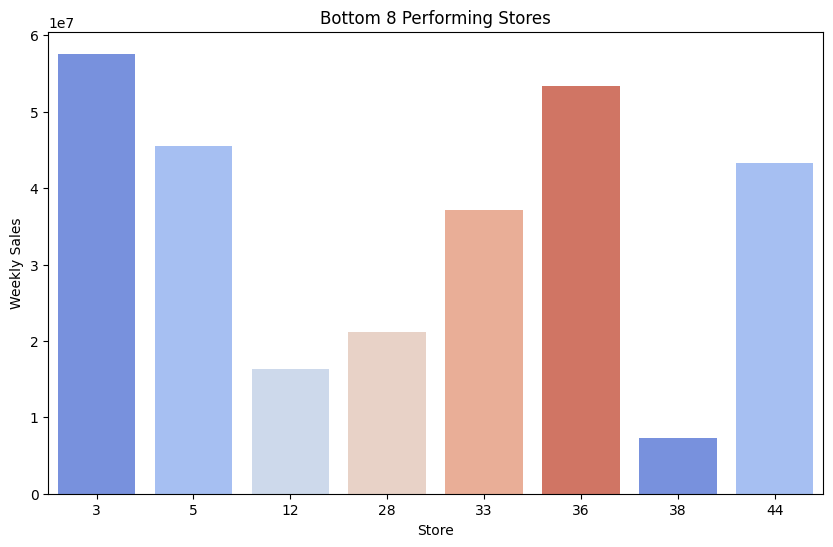

In [ ]:
#visualization
plt.figure(figsize=(10,6))
my_palette=sns.color_palette('coolwarm')
sns.barplot(x=bottom_store['Store'],y=bottom_store['Weekly_Sales'],palette=my_palette)
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Bottom 8 Performing Stores')
plt.show()

# **Inference**
*   **So the 8 Bottom performing stores are 3,5,12,28,33,36,38,44**
*   Where 38 is having lowest sales in this bottom segment  group.

# **how significant is the difference between the highest and lowest performing stores?**

In [ ]:
# As our testing size is very low lets do ttest
from scipy.stats import ttest_ind

In [ ]:
top_sales = top_store['Weekly_Sales']
bottom_sales = bottom_store['Weekly_Sales']

In [ ]:
statistic, p_value = ttest_ind(top_sales, bottom_sales)

In [ ]:
statistic, p_value

(23.768343489359005, 1.0239167675386836e-12)

In [ ]:
if p_value < 0.05:
    print("There is a significant difference between the highest and lowest performing stores.","p_value:",p_value)
else:
    print("There is no significant difference between the highest and lowest performing stores.","p_value:",p_value)

There is a significant difference between the highest and lowest performing stores. p_value: 1.0239167675386836e-12


# **2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.**

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Unemployment_Cat,CPI_cat
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,3,191-220
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,3,191-220
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,3,191-220
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,3,191-220
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,191-220
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,3,191-220
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,3,191-220
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,3,191-220
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,3,191-220


In [ ]:
#  Taking only the date and sales data for model building
df_str = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [ ]:
# Converting date column into index
df_str.set_index('Date',inplace=True)

In [ ]:
df_str

,Weekly_Sales
Date,
2010-02-05,46619845.70
2010-02-12,45317630.91
2010-02-19,45363033.79
2010-02-26,41043557.90
2010-03-05,43813776.69
...,...
2012-09-28,39468648.67
2012-10-05,42823075.29
2012-10-12,41600039.67


# **checking the data stationarity**

In [ ]:
from statsmodels.tsa.stattools import adfuller # importing the adfuller

In [ ]:
result = adfuller(df_str['Weekly_Sales'])

In [ ]:
p_value = result[1]

In [ ]:
if p_value <=0.05:
  print(" null hypothesis is rejected that means the data is stationary")
else:
  print(" null hypothesis is accepted , then data is non stationary")

 null hypothesis is accepted , then data is non stationary


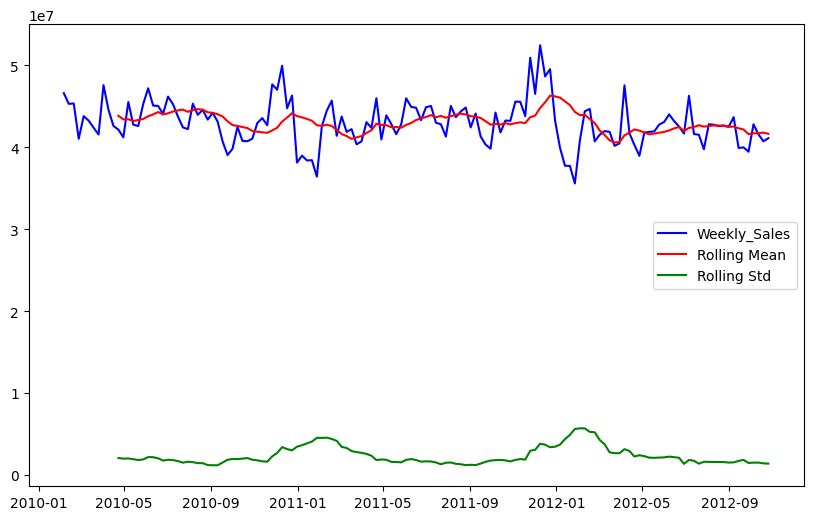

In [ ]:
#visualization
mean_r = df_str.rolling(window=12).mean()
std_r = df_str.rolling(window=12).std()
plt.figure(figsize=(10,6))
plt.plot(df_str,color='blue',label='Weekly_Sales')
plt.plot(mean_r,color='red',label='Rolling Mean')
plt.plot(std_r,color='green',label='Rolling Std')
plt.legend()
plt.show()

# **Inference**
 ## Since the data is stationary, we don't need to perform power transformation and differencing.

# **Model Building**
Forecasting next 12 weeks sale for each store

# **Store No.1**

In [ ]:
store_1_data = df[df['Store'] == 1][['Date', 'Weekly_Sales']] # Filtering data

In [ ]:
store_1_data.set_index('Date',inplace=True) #Converting Date column into index

In [ ]:
store_1_data.isnull().sum()

,0
Weekly_Sales,0


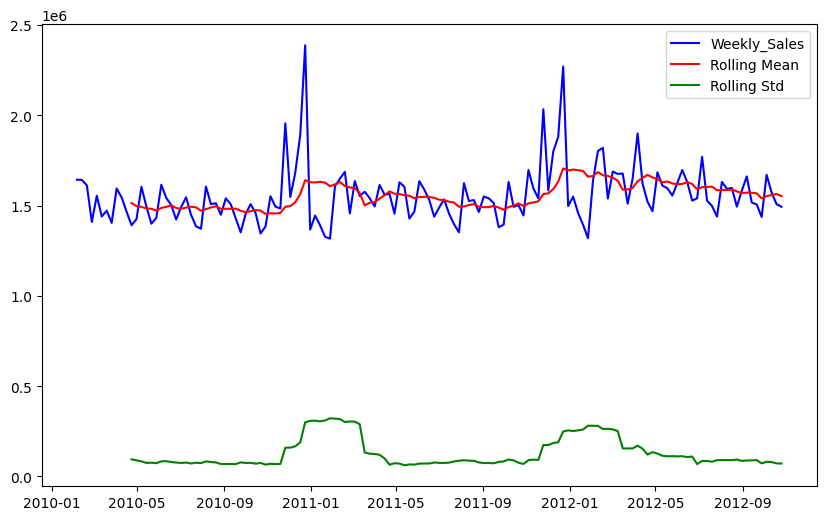

In [ ]:
mean_r_1 = store_1_data.rolling(window=12).mean()
std_r_1 = store_1_data.rolling(window=12).std()
plt.figure(figsize=(10,6))
plt.plot(store_1_data,color='blue',label='Weekly_Sales')
plt.plot(mean_r_1,color='red',label='Rolling Mean')
plt.plot(std_r_1,color='green',label='Rolling Std')
plt.legend()
plt.show()

# **Importing auto arima for best p,d,q value**

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.4 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
arima_model = auto_arima(store_1_data['Weekly_Sales'], seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3819.024, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3850.005, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3838.724, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3831.432, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3848.013, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3819.410, Time=0.66 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3821.284, Time=0.54 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3817.475, Time=0.30 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3818.117, Time=0.57 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.24 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3810.990, Time=4.06 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3809.486, Time=1.23 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3810.431, Time=0.71 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=3810.637, Time=1.70 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : 

# **Model Building**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(store_1_data, order=(2, 1, 3))
arima_fit = model.fit()# fitting the model
# predictions
pred = arima_fit.predict(start=len(store_1_data)-50, end=len(store_1_data) , dynamic=False)



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


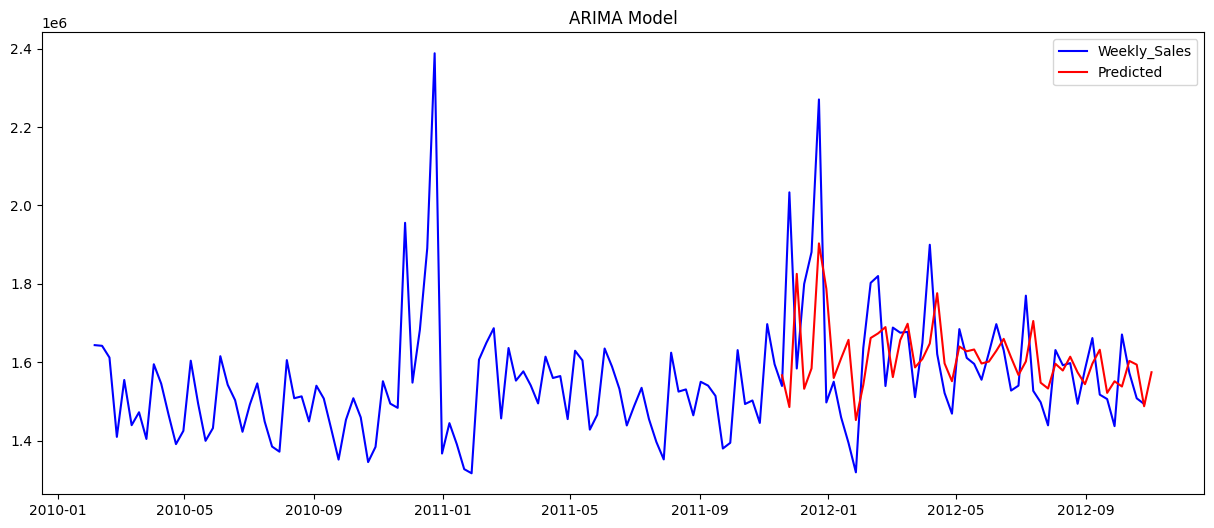

In [ ]:
#arima complete data visualization
plt.figure(figsize=(15,6))
plt.plot(store_1_data,color='blue',label='Weekly_Sales')
plt.plot(pred,color='red',label='Predicted')
plt.title('ARIMA Model')
plt.legend()

In [ ]:
#forecasting next 12 week sales
forecast = arima_fit.forecast(steps=12)

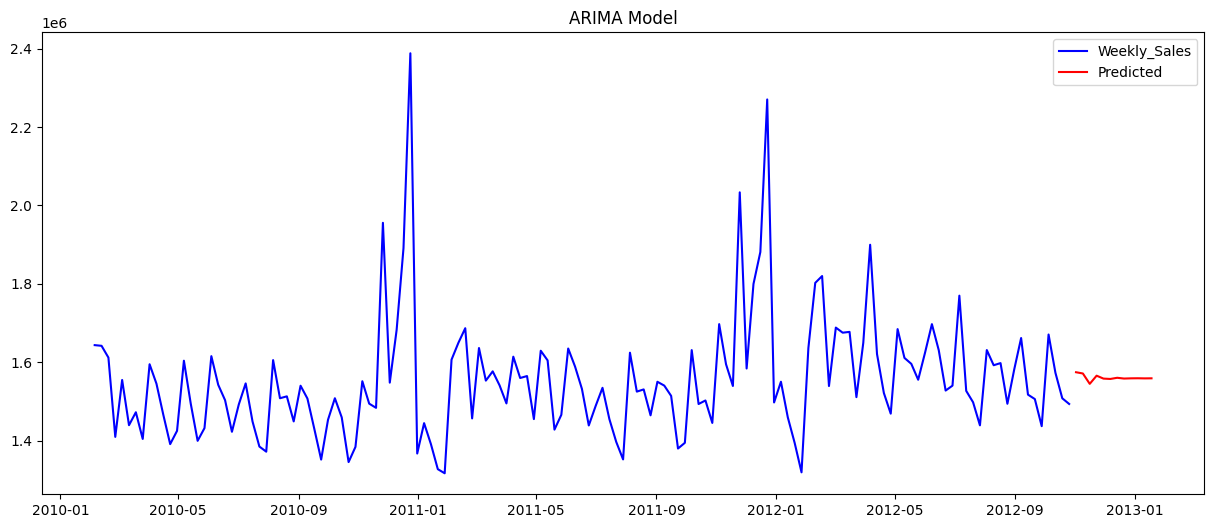

In [ ]:
#ploting
plt.figure(figsize=(15,6))
plt.plot(store_1_data,color='blue',label='Weekly_Sales')
plt.plot(forecast,color='red',label='Predicted')
plt.title('ARIMA Model')
plt.legend()
plt.show()

In [ ]:
store_1_data

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68
...,...
2012-09-28,1437059.26
2012-10-05,1670785.97
2012-10-12,1573072.81


# **Given that our data does not exhibit any obvious trend or pattern, why  we are going  to use the SARIMAX model?**

**Hidden Seasonality:** While initial analysis might not reveal obvious seasonality, there could be subtle seasonal patterns that SARIMA can capture. The weekly sales data shows some recurring fluctuations, particularly during holiday seasons or specific times of the year (refer to question (b) inferences), and temperature which is a external factor which usually cause sesionality in this case showing a weak corelation but overall with external factor data and date we had some sesional pattern and trends.These patterns might not be prominent but can still influence the model's accuracy. SARIMA is designed to identify and model such hidden or complex seasonal patterns.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_sarima = SARIMAX(store_1_data, order=(2, 1, 3), seasonal_order=(2, 1, 3, 12))
sarima_result = model_sarima.fit()
sarima_result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(2, 1, 3)x(2, 1, 3, 12)   Log Likelihood               -1762.438
Date:                            Fri, 29 Nov 2024   AIC                           3546.876
Time:                                    05:37:32   BIC                           3578.419
Sample:                                02-05-2010   HQIC                          3559.693
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9365      0.242     -3.878      0.000      -1.410      -0.463
ar.L2         -0.4634      0.236     -1.966      0.049      -0.925      -0.001
ma.L1          0.7140      0.209      3.418      0.001       0.305       1.123
ma.L2          0.1044      0.213      0.490      0.624      -0.313       0.522
ma.L3         -0.4379      0.079     -5.534      0.000      -0.593      -0.283
ar.S.L12      -0.0311      0.965     -0.032      0.974      -1.922       1.860
ar.S.L24      -0.7583      0.759     -0.999      0.318      -2.246       0.729
ma.S.L12      -0.6813      0.951     -0.716      0.474      -2.546       1.184
ma.S.L24       0.6213      1.085      0.572      0.567      -1.506       2.749
ma.S.L36      -0.5481      0.594     -0.922      0.356      -1.713       0.617
sigma2      4.748e+10   7.96e-11   5.96e+20      0.000    4.75e+10    4.75e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.97   Jarque-Bera (JB):                19.46
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.66e+37. Standard errors may be unstable.
"""

In [ ]:
pred_sarima = sarima_result.predict(start=len(store_1_data)-50, end=len(store_1_data) , dynamic=False)

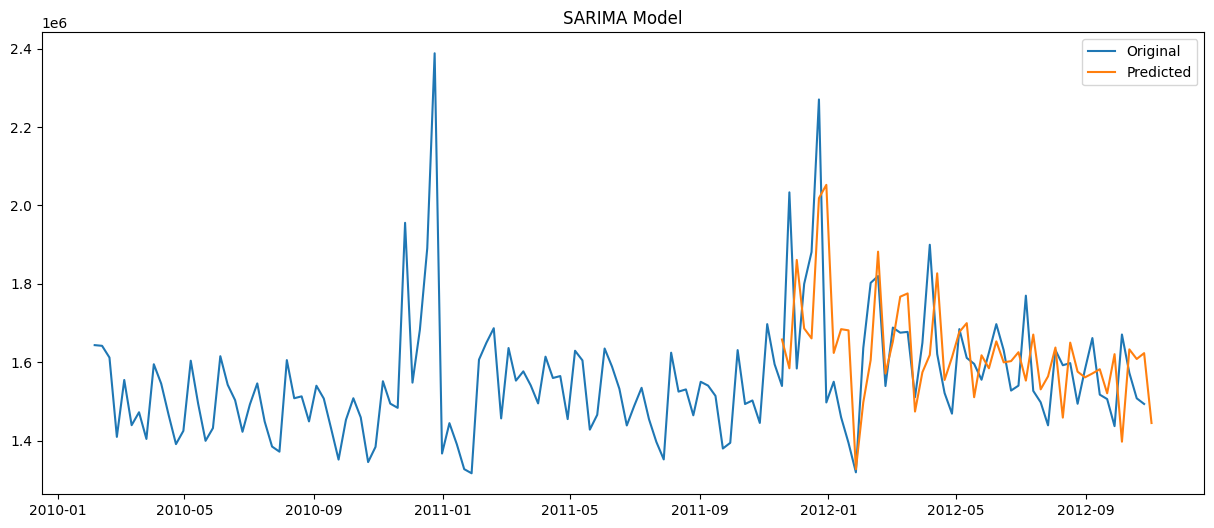

In [ ]:
#visualization
plt.figure(figsize=(15,6))
plt.plot(store_1_data,label='Original')
plt.plot(pred_sarima,label='Predicted')
plt.legend(loc='best')
plt.title('SARIMA Model')
plt.show()

In [ ]:
#forecasting
forecast_sarima = sarima_result.forecast(steps=12)

<Axes: >

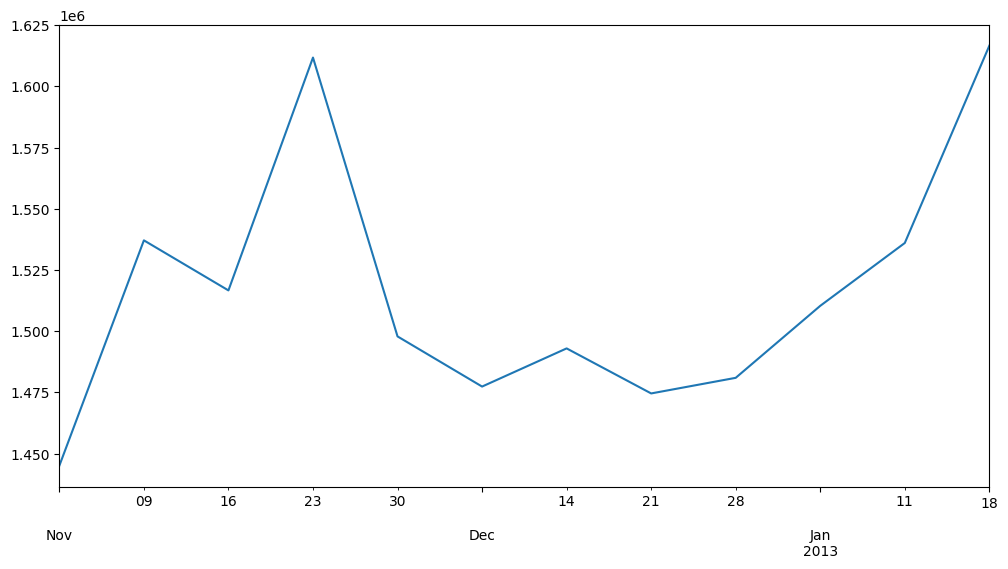

In [ ]:
forecast_sarima.plot()

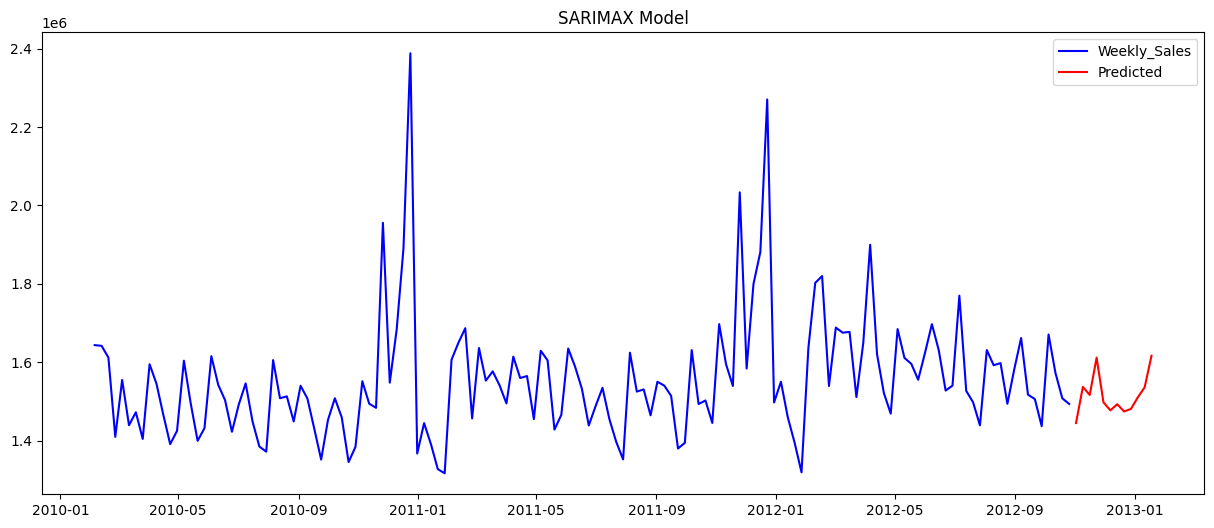

In [ ]:
#sarima Visualization
plt.figure(figsize=(15,6))
plt.plot(store_1_data,color='blue',label='Weekly_Sales')
plt.plot(forecast_sarima,color='red',label='Predicted')
plt.title('SARIMAX Model')
plt.legend()
plt.show()

# **Store No. 33**

In [ ]:
store_33_data = df[df['Store'] == 33][['Date', 'Weekly_Sales']] # Filtering data

In [ ]:
store_33_data.set_index('Date',inplace=True) #Converting Date column into index

In [ ]:
store_33_data.isnull().sum()


,0
Weekly_Sales,0


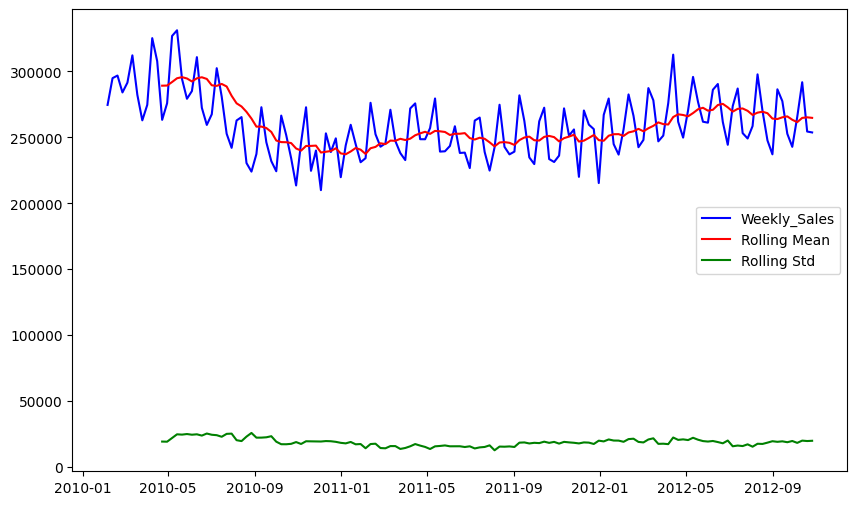

In [ ]:
mean_r_33 = store_33_data.rolling(window=12).mean()
std_r_33 = store_33_data.rolling(window=12).std()
plt.figure(figsize=(10,6))
plt.plot(store_33_data,color='blue',label='Weekly_Sales')
plt.plot(mean_r_33,color='red',label='Rolling Mean')
plt.plot(std_r_33,color='green',label='Rolling Std')
plt.legend()
plt.show()

In [ ]:
arima_model = auto_arima(store_33_data['Weekly_Sales'], seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3280.797, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3282.281, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3290.652, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3278.805, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3350.533, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.232 seconds


In [ ]:
store_33_data

,Weekly_Sales
Date,
2010-02-05,274593.43
2010-02-12,294882.83
2010-02-19,296850.83
2010-02-26,284052.77
2010-03-05,291484.89
...,...
2012-09-28,242813.51
2012-10-05,265444.90
2012-10-12,291781.15


In [ ]:
model = ARIMA(store_33_data, order=(0, 1, 0))
arima_fit = model.fit()# fitting the model
# predictions
pred2 = arima_fit.predict(start=len(store_33_data)-50, end=len(store_33_data) , dynamic=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


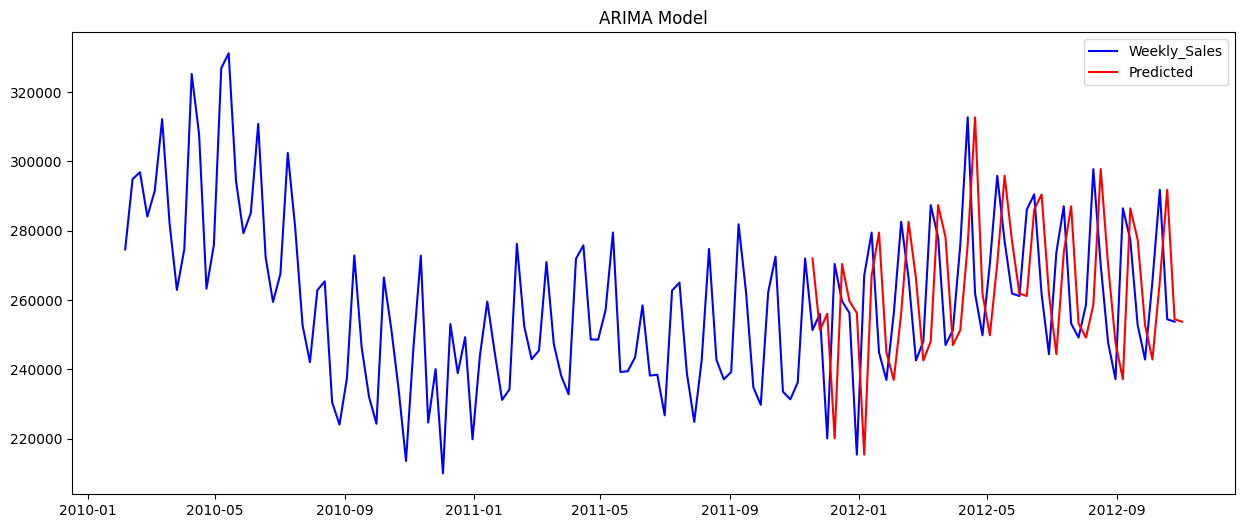

In [ ]:
#arima data visualization
plt.figure(figsize=(15,6))
plt.plot(store_33_data,color='blue',label='Weekly_Sales')
plt.plot(pred2,color='red',label='Predicted')
plt.title('ARIMA Model')
plt.legend()
plt.show()

In [ ]:
#forecasting next 12 week sales
forecast2 = arima_fit.forecast(steps=12)

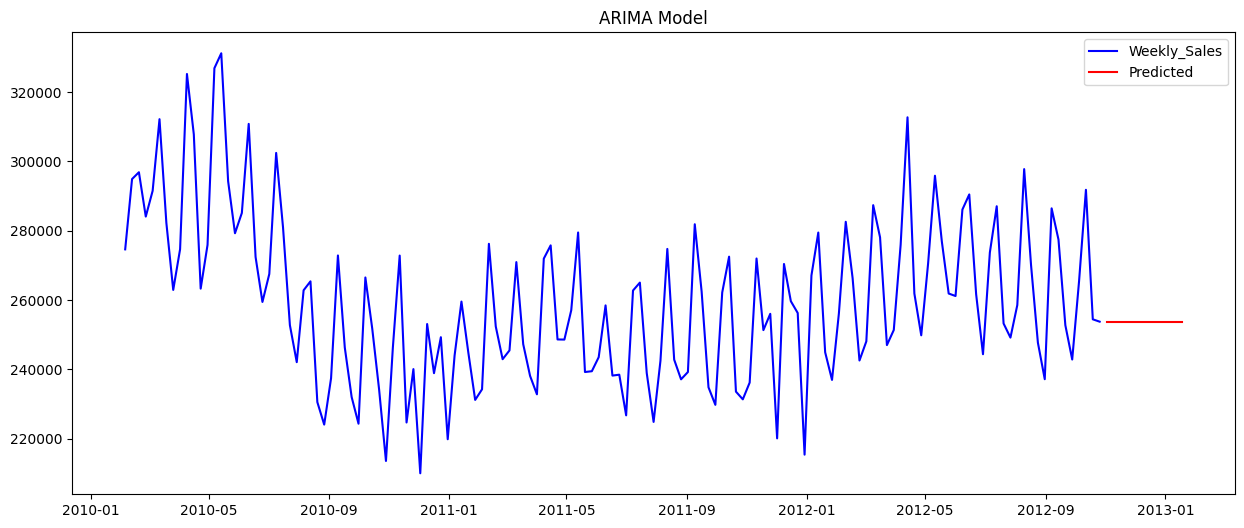

In [ ]:
#ploting
plt.figure(figsize=(15,6))
plt.plot(store_33_data,color='blue',label='Weekly_Sales')
plt.plot(forecast2,color='red',label='Predicted')
plt.title('ARIMA Model')
plt.legend()
plt.show()

# **Will use Sarima model for hidden seasionality**

In [ ]:
model_sarima = SARIMAX(store_33_data, order=(0, 1, 0), seasonal_order=(0, 1, 0, 12))
sarima_result = model_sarima.fit()
sarima_result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               -1552.683
Date:                            Fri, 29 Nov 2024   AIC                           3107.367
Time:                                    06:18:55   BIC                           3110.234
Sample:                                02-05-2010   HQIC                          3108.532
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.254e+09   1.73e+08      7.239      0.000    9.14e+08    1.59e+09
===================================================================================
Ljung-Box (L1) (Q):                  10.27   Jarque-Bera (JB):                 5.09
Prob(Q):                              0.00   Prob(JB):                         0.08
Heteroskedasticity (H):               0.75   Skew:                             0.35
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred_sarima2 = sarima_result.predict(start=len(store_33_data)-50, end=len(store_33_data) , dynamic=False)

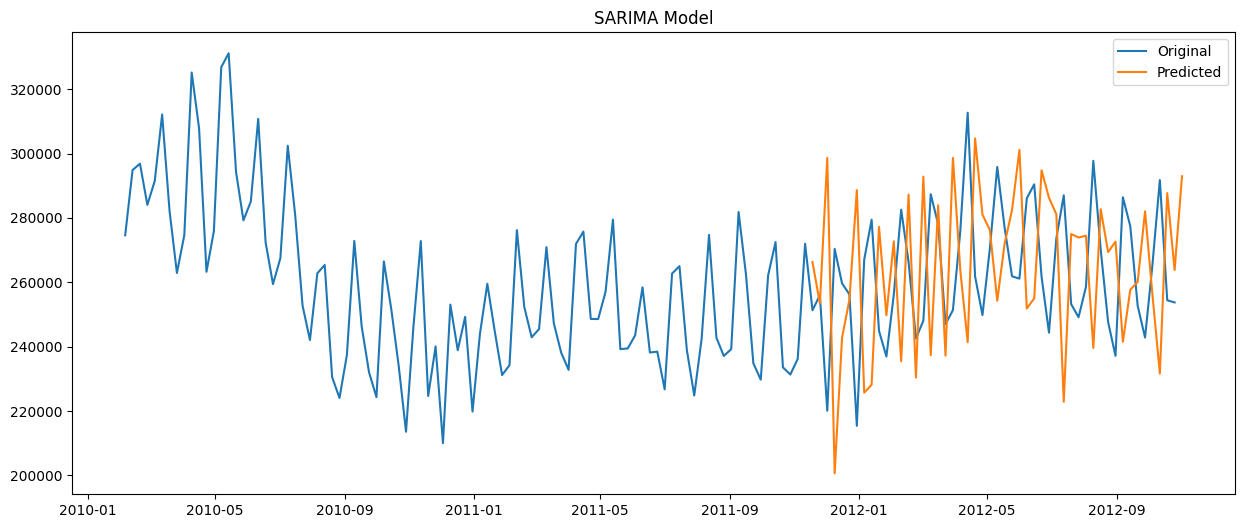

In [ ]:
#viusulization
plt.figure(figsize=(15,6))
plt.plot(store_33_data,label='Original')
plt.plot(pred_sarima2,label='Predicted')
plt.legend(loc='best')
plt.title('SARIMA Model')
plt.show()

In [ ]:
#forecast sarima
forecast_sarima2 = sarima_result.forecast(steps=12)

<Axes: >

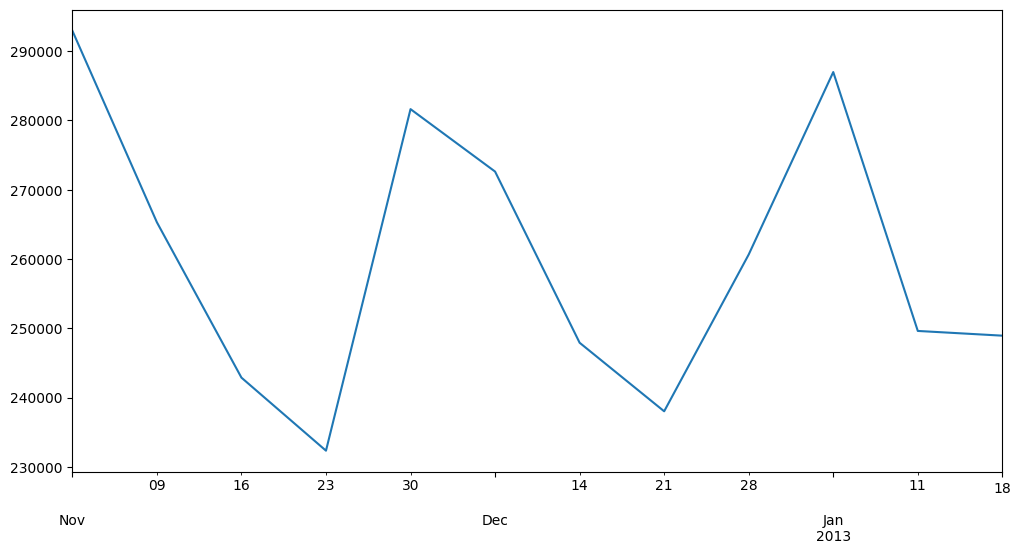

In [ ]:
forecast_sarima2.plot()

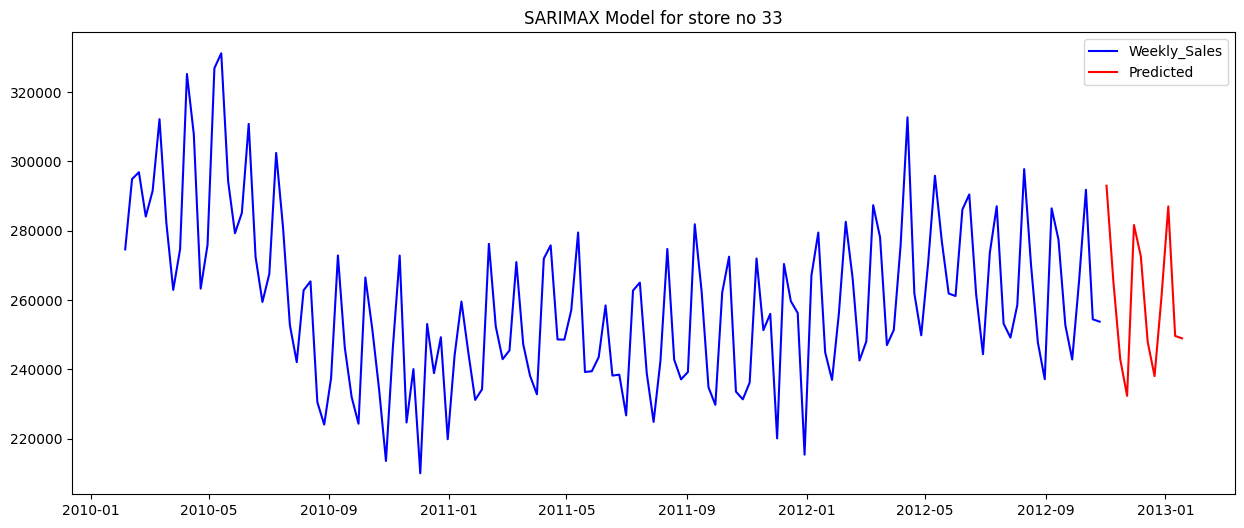

In [160]:
#visulization sarima model with data
plt.figure(figsize=(15,6))
plt.plot(store_33_data,color='blue',label='Weekly_Sales')
plt.plot(forecast_sarima2,color='red',label='Predicted')
plt.title('SARIMAX Model for store no 33')
plt.legend()
plt.show()

# **Store No.5**

In [140]:
store_5_data = df[df['Store'] == 5][['Date', 'Weekly_Sales']] # Filtering data

In [141]:
store_5_data.set_index('Date',inplace=True) #Converting Date column into index

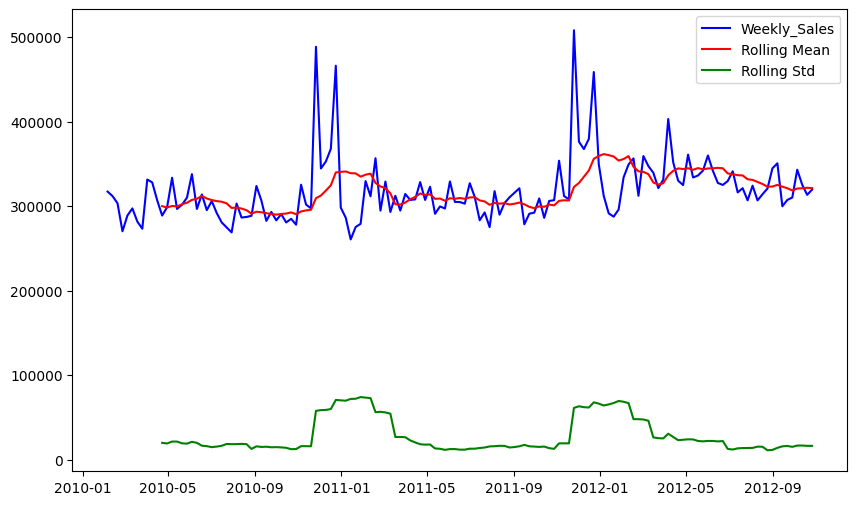

In [142]:
#Data visualization
mean_r_5 = store_5_data.rolling(window=12).mean()
std_r_5 = store_5_data.rolling(window=12).std()
plt.figure(figsize=(10,6))
plt.plot(store_5_data,color='blue',label='Weekly_Sales')
plt.plot(mean_r_5,color='red',label='Rolling Mean')
plt.plot(std_r_5,color='green',label='Rolling Std')
plt.legend()
plt.show()

# **Lets find p,d,q value for arima model**

In [143]:
arima_model = auto_arima(store_5_data['Weekly_Sales'], seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3427.452, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3410.502, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3400.127, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3425.456, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3397.113, Time=1.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3398.646, Time=0.49 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3398.543, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3398.442, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3405.850, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3395.851, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3398.350, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3408.507, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3397.068, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

In [148]:
model = ARIMA(store_5_data, order=(1, 1, 1))
arima_fit = model.fit()# fitting the model
# predictions
pred3 = arima_fit.predict(start=len(store_5_data)-50, end=len(store_5_data) , dynamic=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


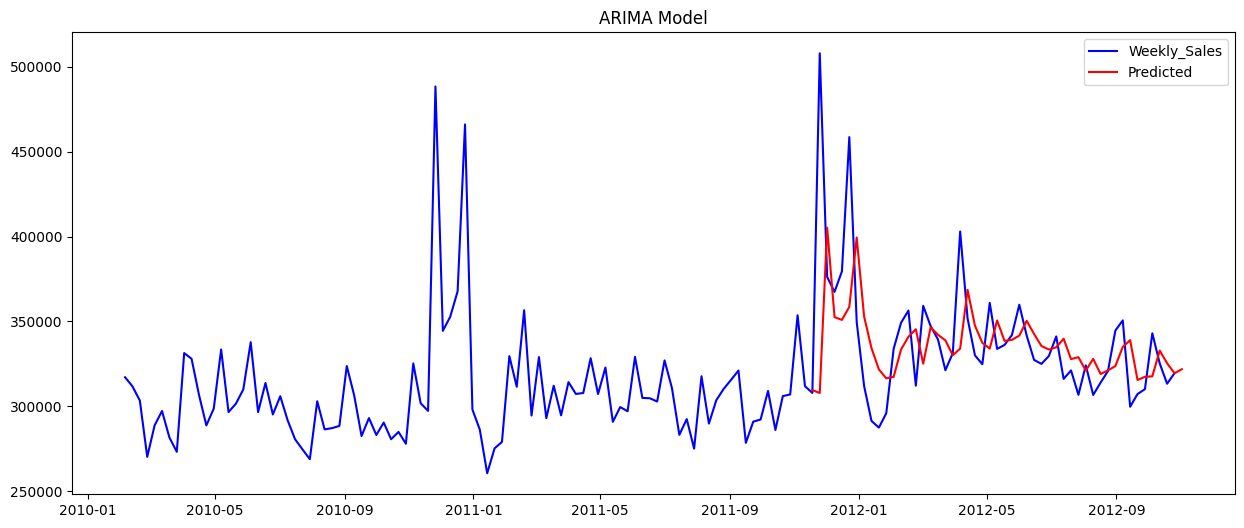

In [149]:
#pred visualization
plt.figure(figsize=(15,6))
plt.plot(store_5_data,color='blue',label='Weekly_Sales')
plt.plot(pred3,color='red',label='Predicted')
plt.title('ARIMA Model')
plt.legend()
plt.show()

In [150]:
#forecasting next 12 weeks
forecast3 = arima_fit.forecast(steps=12)

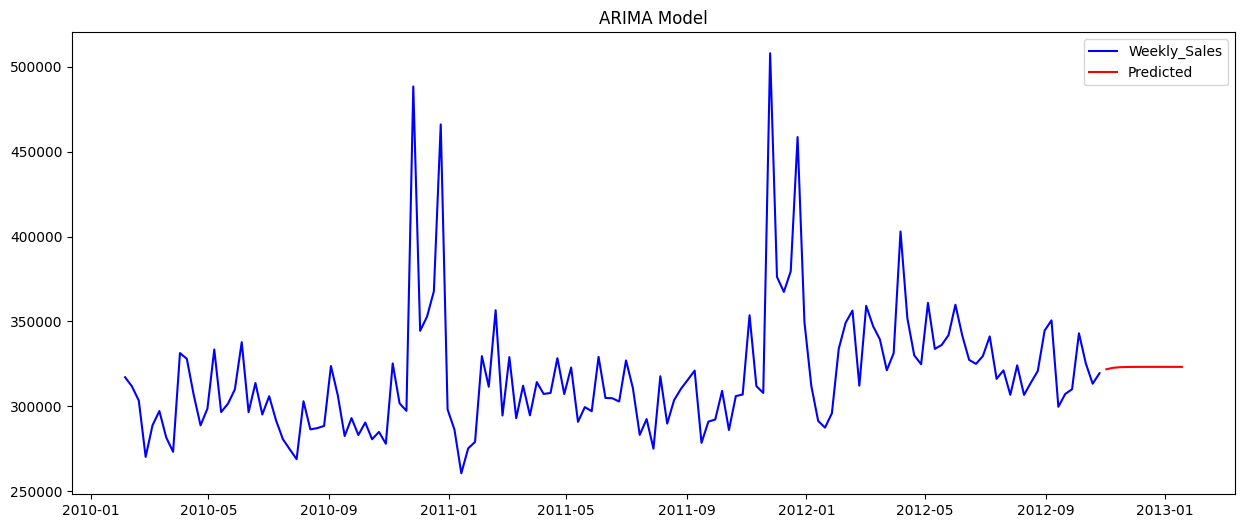

In [151]:
#ploting
plt.figure(figsize=(15,6))
plt.plot(store_5_data,color='blue',label='Weekly_Sales')
plt.plot(forecast3,color='red',label='Predicted')
plt.title('ARIMA Model')
plt.legend()
plt.show()

# **Sarimax model for hidden seasionality**

In [152]:
model_sarima = SARIMAX(store_5_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [153]:
sarima_result = model_sarima.fit()
sarima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1574.093
Date:                            Fri, 29 Nov 2024   AIC                           3158.187
Time:                                    07:01:54   BIC                           3172.524
Sample:                                02-05-2010   HQIC                          3164.012
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0679      0.301      0.226      0.821      -0.521       0.657
ma.L1         -0.4816      0.286     -1.682      0.093      -1.043       0.080
ar.S.L12       0.1855      0.122      1.515      0.130      -0.055       0.425
ma.S.L12      -0.8577      0.158     -5.413      0.000      -1.168      -0.547
sigma2       2.46e+09   1.06e-10   2.32e+19      0.000    2.46e+09    2.46e+09
===================================================================================
Ljung-Box (L1) (Q):                   1.08   Jarque-Bera (JB):               194.13
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               0.35   Skew:                             1.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.12e+35. Standard errors may be unstable.
"""

In [154]:
pred_sarima3 = sarima_result.predict(start=len(store_5_data)-50, end=len(store_5_data) , dynamic=False)

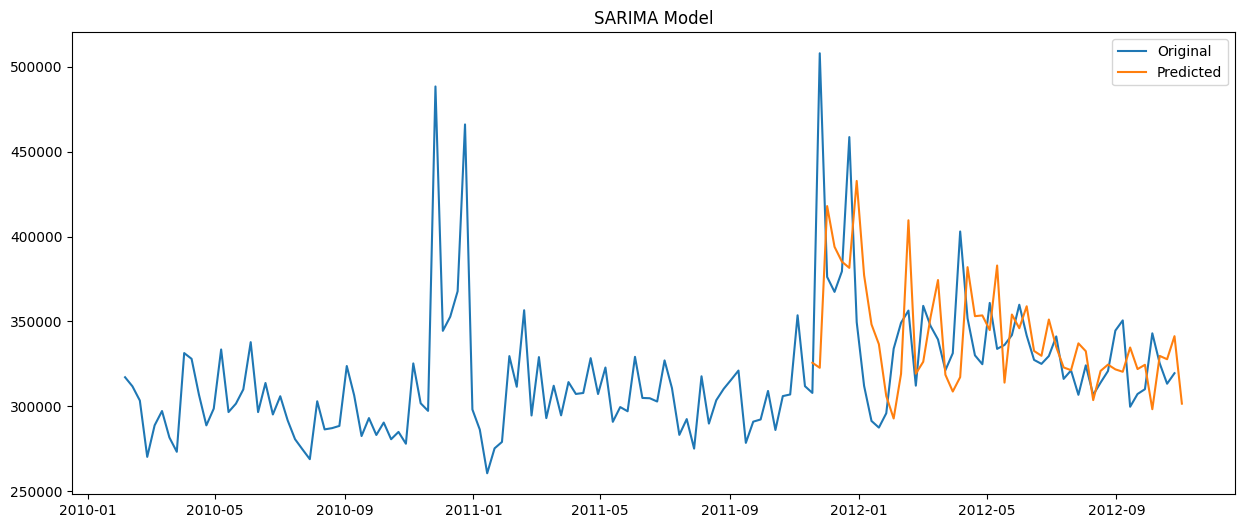

In [155]:
#visualization
plt.figure(figsize=(15,6))
plt.plot(store_5_data,label='Original')
plt.plot(pred_sarima3,label='Predicted')
plt.legend(loc='best')
plt.title('SARIMA Model')
plt.show()

In [156]:
#forcasting next 12 weeks (with hidden seasionlity)
forecast_sarima3 = sarima_result.forecast(steps=12)

<Axes: >

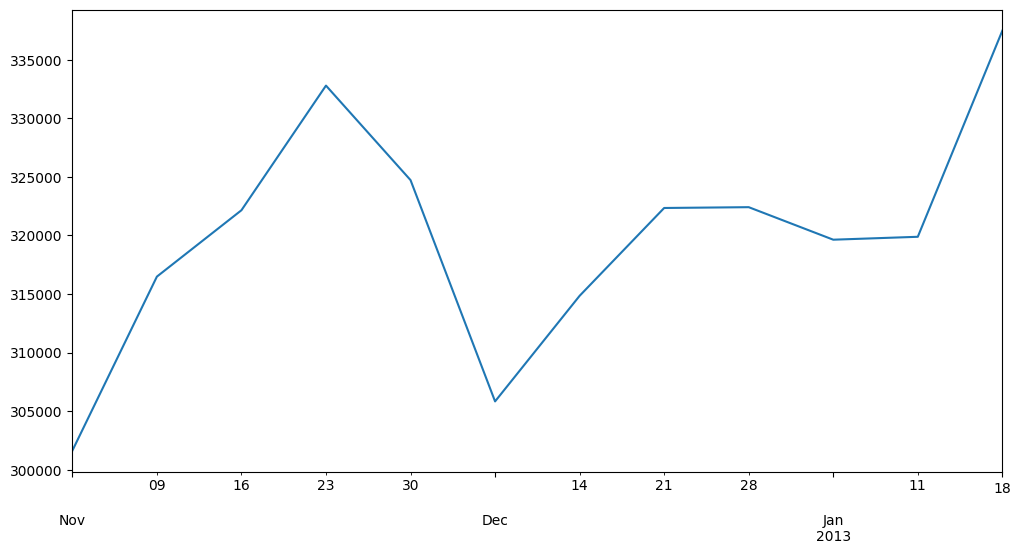

In [157]:
forecast_sarima3.plot()

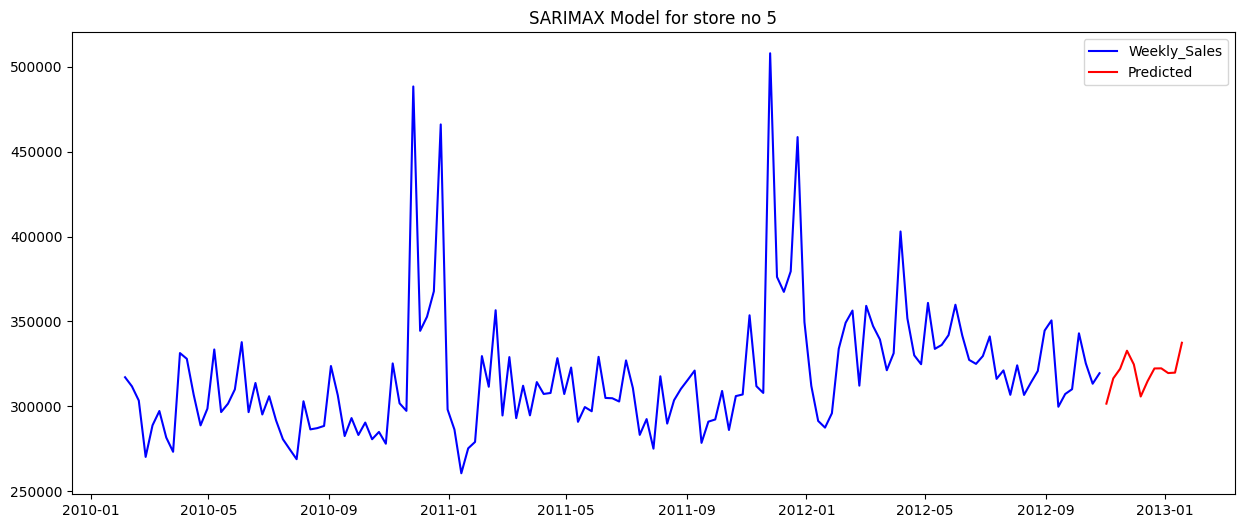

In [159]:
#sarima visualization
plt.figure(figsize=(15,6))
plt.plot(store_5_data,color='blue',label='Weekly_Sales')
plt.plot(forecast_sarima3,color='red',label='Predicted')
plt.title('SARIMAX Model for store no 5')
plt.legend()
plt.show()

# **Store No.11**

In [168]:
store_11_data = df[df['Store'] == 11][['Date', 'Weekly_Sales']] # Filtering data

In [169]:
store_11_data.set_index('Date',inplace=True) #Converting Date column into index

In [170]:
store_11_data

,Weekly_Sales
Date,
2010-02-05,1528008.64
2010-02-12,1574684.08
2010-02-19,1503298.70
2010-02-26,1336404.65
2010-03-05,1426622.65
...,...
2012-09-28,1227430.73
2012-10-05,1422794.26
2012-10-12,1311965.09


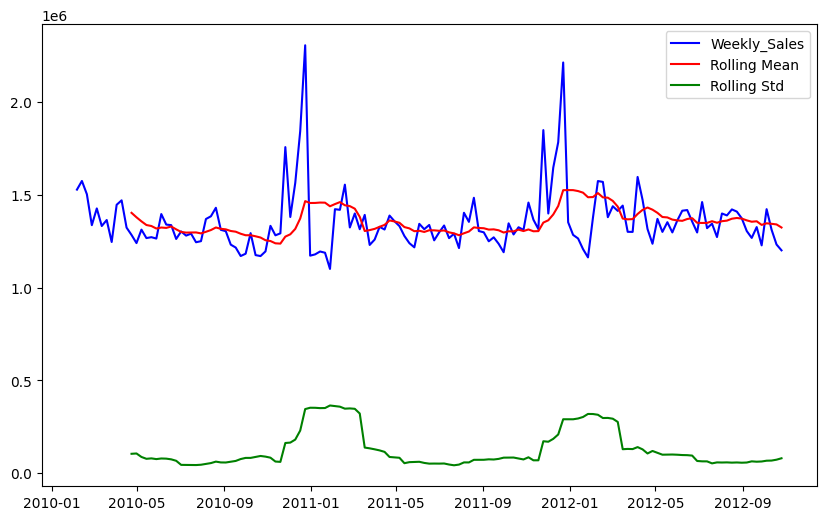

In [171]:
#Lets visualize it with respect to rolling mean & std
mean_r_11 = store_11_data.rolling(window=12).mean()
std_r_11 = store_11_data.rolling(window=12).std()
plt.figure(figsize=(10,6))
plt.plot(store_11_data,color='blue',label='Weekly_Sales')
plt.plot(mean_r_11,color='red',label='Rolling Mean')
plt.plot(std_r_11,color='green',label='Rolling Std')
plt.legend()
plt.show()

# **Importing auto arima for best p,d,q value**

In [264]:
arima_model = auto_arima(store_11_data['Weekly_Sales'], seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4448.338, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4354.583, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3850.761, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.36 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=4327.555, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3825.178, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3829.469, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3823.268, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3846.173, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3824.965, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3826.924, Time=0

In [265]:
model = ARIMA(store_11_data, order=(1,0,0))
arima_fit = model.fit()# fitting the model
# predictions
pred4 = arima_fit.predict(start=len(store_11_data)-50, end=len(store_11_data) , dynamic=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


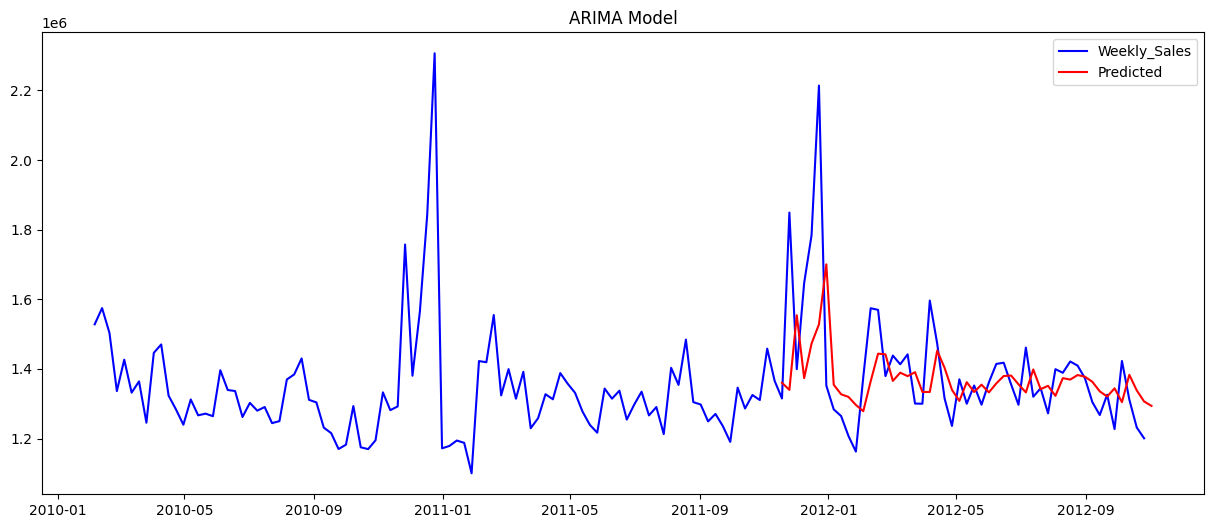

In [266]:
#arima model visualization of pred and original data
plt.figure(figsize=(15,6))
plt.plot(store_11_data,color='blue',label='Weekly_Sales')
plt.plot(pred4,color='red',label='Predicted')
plt.title('ARIMA Model')
plt.legend()
plt.show()

In [267]:
#forecasting next 12 weeks sale
forecast4 = arima_fit.forecast(steps=12)

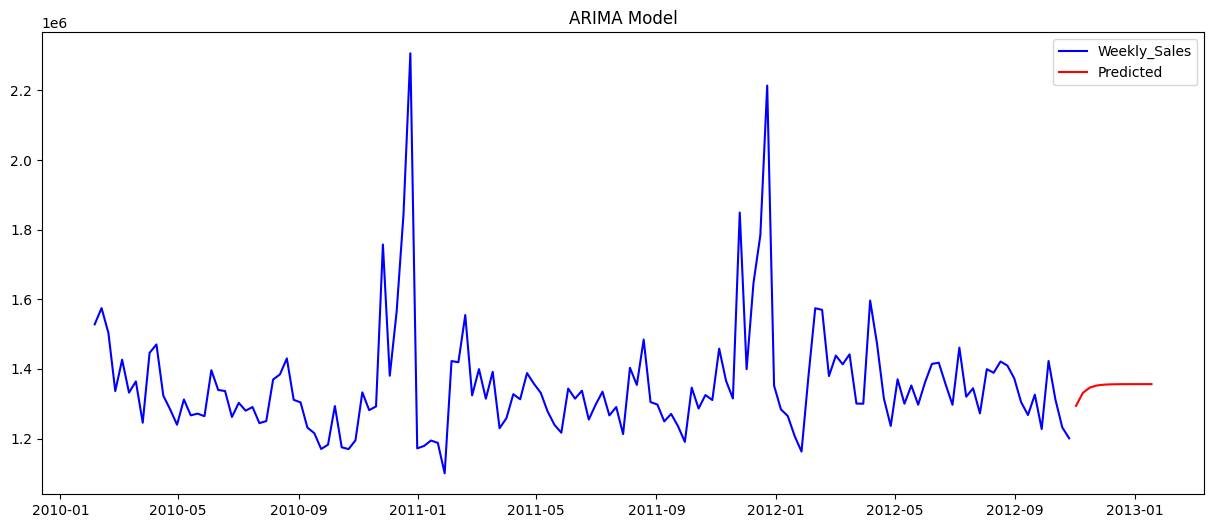

In [268]:
#ploting
plt.figure(figsize=(15,6))
plt.plot(store_11_data,color='blue',label='Weekly_Sales')
plt.plot(forecast4,color='red',label='Predicted')
plt.title('ARIMA Model')
plt.legend()
plt.show()

#**Sarimax model for hidden seaionality**

In [270]:
model_sarima = SARIMAX(store_11_data, order=(1, 0, 0), seasonal_order=(1, 0, 0, 12))
sarima_result = model_sarima.fit()
sarima_result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood               -1935.696
Date:                            Fri, 29 Nov 2024   AIC                           3877.392
Time:                                    08:23:08   BIC                           3886.281
Sample:                                02-05-2010   HQIC                          3881.004
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9910      0.009    110.202      0.000       0.973       1.009
ar.S.L12       0.0172      0.116      0.148      0.882      -0.211       0.245
sigma2      3.251e+10   3.11e-12   1.04e+22      0.000    3.25e+10    3.25e+10
===================================================================================
Ljung-Box (L1) (Q):                  15.87   Jarque-Bera (JB):              1162.14
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -1.95
Prob(H) (two-sided):                  0.30   Kurtosis:                        16.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.04e+36. Standard errors may be unstable.
"""

In [271]:
pred_sarima4 = sarima_result.predict(start=len(store_11_data)-50, end=len(store_11_data) , dynamic=False)

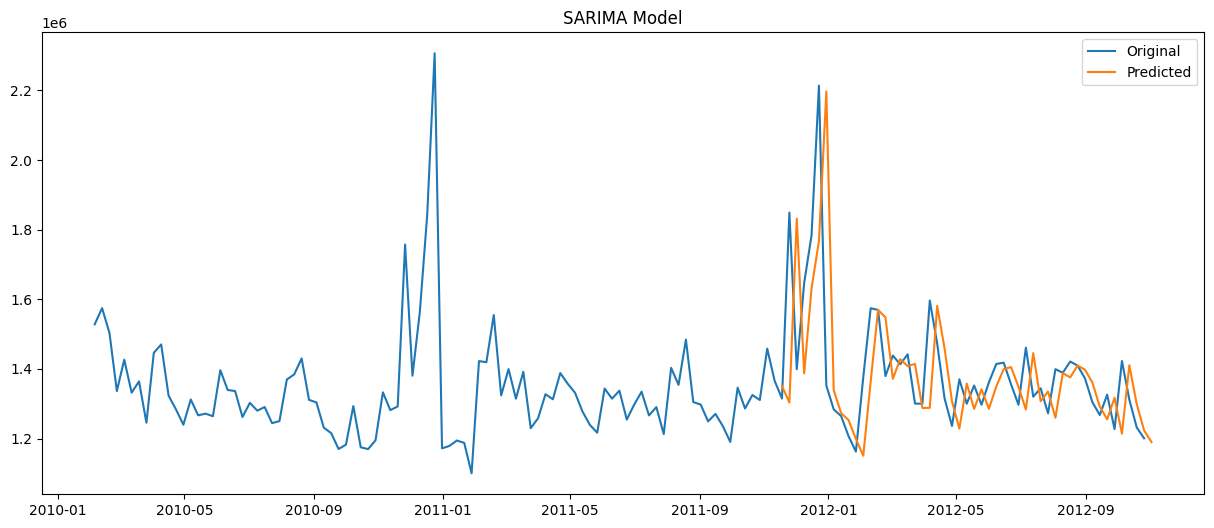

In [272]:
#visualization
plt.figure(figsize=(15,6))
plt.plot(store_11_data,label='Original')
plt.plot(pred_sarima4,label='Predicted')
plt.legend(loc='best')
plt.title('SARIMA Model')
plt.show()

In [273]:
#forecasting next 12 weeeks sale
forecast_sarima4 = sarima_result.forecast(steps=12)

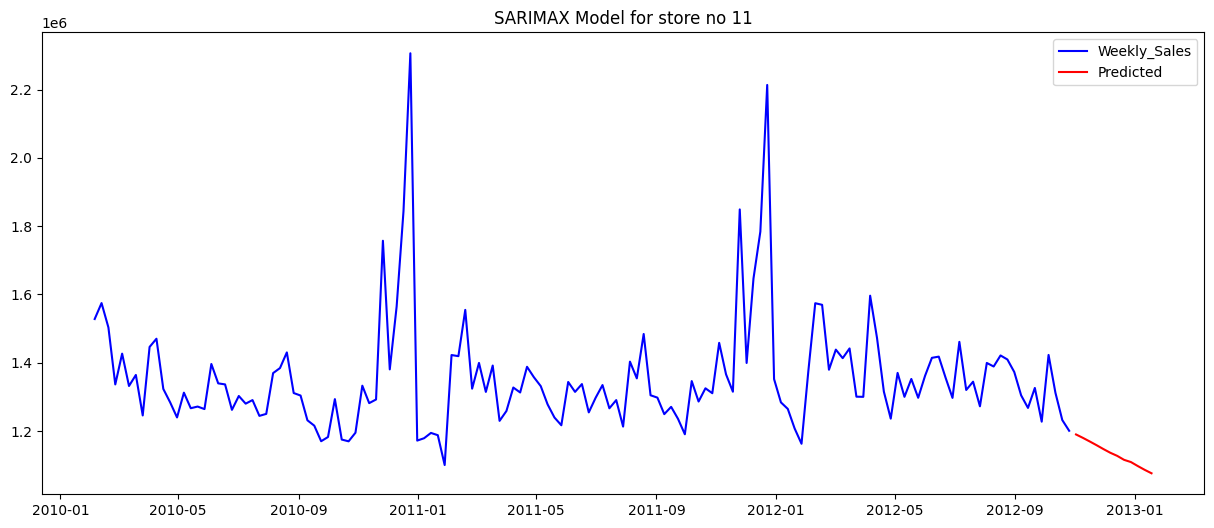

In [274]:
#sarima visualization
plt.figure(figsize=(15,6))
plt.plot(store_11_data,color='blue',label='Weekly_Sales')
plt.plot(forecast_sarima4,color='red',label='Predicted')
plt.title('SARIMAX Model for store no 11')
plt.legend()
plt.show()

### **As we can see in the graph, our prediction is not accurate because we did not apply moving average and differencing, which leads to a zero trend and seasonality. In our data, we have observed hidden seasonality in previous store forecasting. So, let's apply some parameters in auto ARIMA for better results.**

In [275]:
arima_model = auto_arima(store_11_data['Weekly_Sales'],start_p=1, start_q=1,test='adf',
                      max_p=5, max_q=5,
                      m=1,
                      d=1,
                      seasonal=False,
                      start_P=0,
                      D=None,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3823.888, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3844.931, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3837.161, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3833.412, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3842.957, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3825.996, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3827.672, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3836.070, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3815.248, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3831.313, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3835.120, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3817.120, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=i

# **Model Building**

In [276]:
model = ARIMA(store_11_data, order=(1,1,1))
arima_fit = model.fit()# fitting the model
# predictions
pred4 = arima_fit.predict(start=len(store_11_data)-50, end=len(store_11_data) , dynamic=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


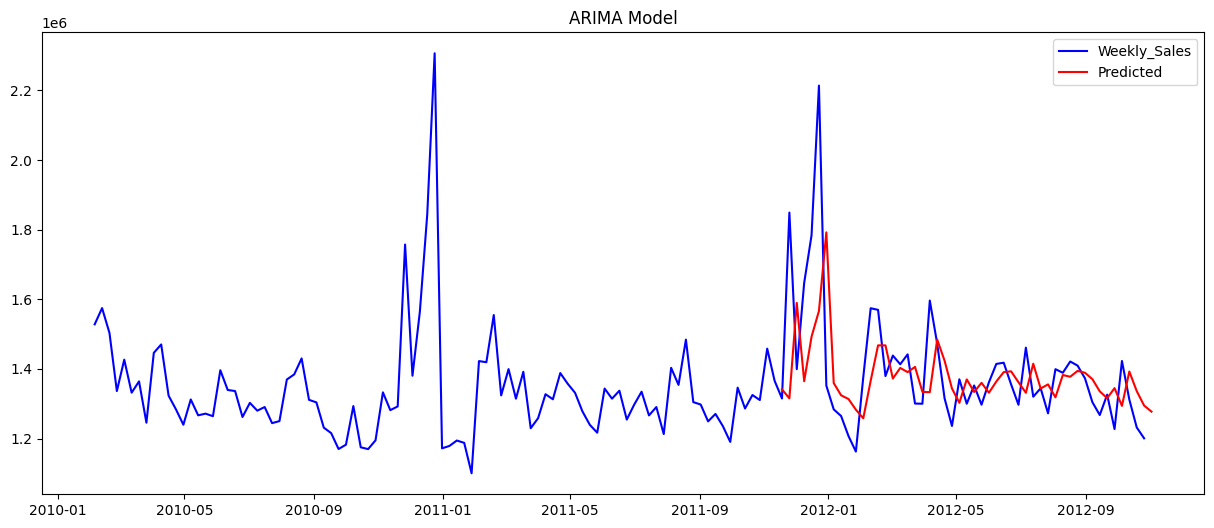

In [277]:
#arima model visualization of pred and original data
plt.figure(figsize=(15,6))
plt.plot(store_11_data,color='blue',label='Weekly_Sales')
plt.plot(pred4,color='red',label='Predicted')
plt.title('ARIMA Model')
plt.legend()
plt.show()

In [278]:
#forecasting next 12 weeks sale
forecast4 = arima_fit.forecast(steps=12)

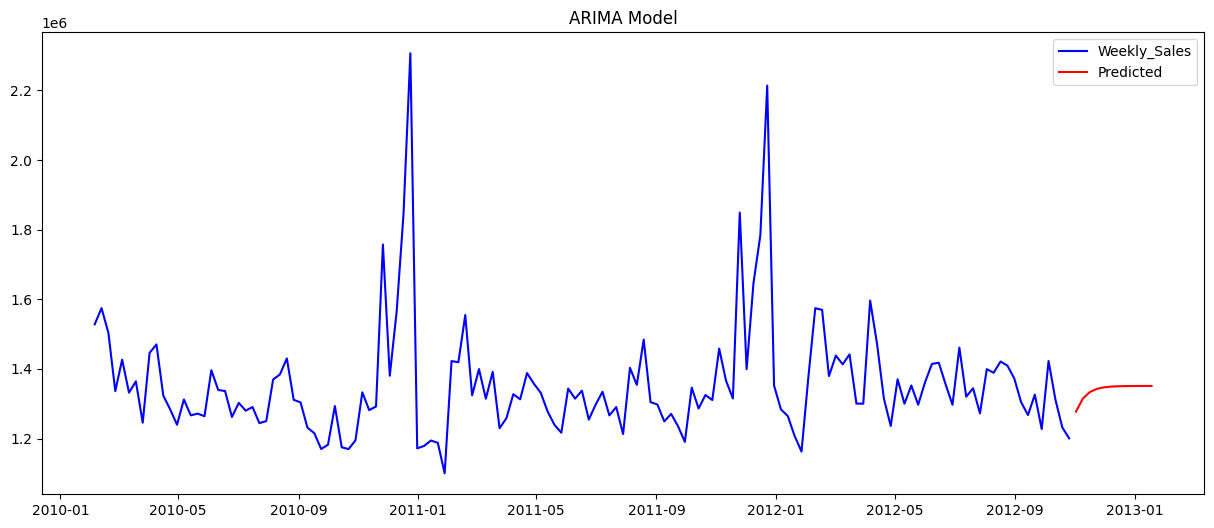

In [279]:
#ploting
plt.figure(figsize=(15,6))
plt.plot(store_11_data,color='blue',label='Weekly_Sales')
plt.plot(forecast4,color='red',label='Predicted')
plt.title('ARIMA Model')
plt.legend()
plt.show()

#**Sarimax model for hidden seaionality**

In [280]:
model_sarima = SARIMAX(store_11_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = model_sarima.fit()
sarima_result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1774.442
Date:                            Fri, 29 Nov 2024   AIC                           3558.884
Time:                                    08:29:27   BIC                           3573.222
Sample:                                02-05-2010   HQIC                          3564.710
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4534      0.307      1.479      0.139      -0.148       1.054
ma.L1         -0.7259      0.252     -2.886      0.004      -1.219      -0.233
ar.S.L12       0.0778      0.139      0.561      0.575      -0.194       0.350
ma.S.L12      -0.8123      0.196     -4.141      0.000      -1.197      -0.428
sigma2      5.963e+10   5.86e-12   1.02e+22      0.000    5.96e+10    5.96e+10
===================================================================================
Ljung-Box (L1) (Q):                   1.52   Jarque-Bera (JB):               185.92
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.11e+38. Standard errors may be unstable.
"""

In [281]:
pred_sarima4 = sarima_result.predict(start=len(store_11_data)-50, end=len(store_11_data) , dynamic=False)

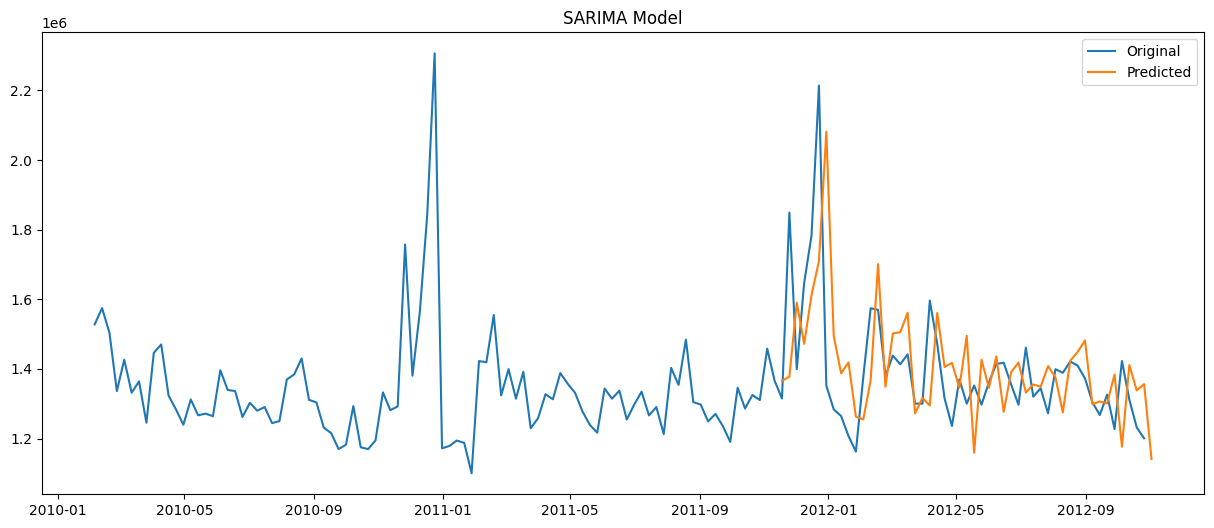

In [282]:
#visualization
plt.figure(figsize=(15,6))
plt.plot(store_11_data,label='Original')
plt.plot(pred_sarima4,label='Predicted')
plt.legend(loc='best')
plt.title('SARIMA Model')
plt.show()

In [283]:
#forecasting next 12 weeeks sale
forecast_sarima4 = sarima_result.forecast(steps=12)

<Axes: >

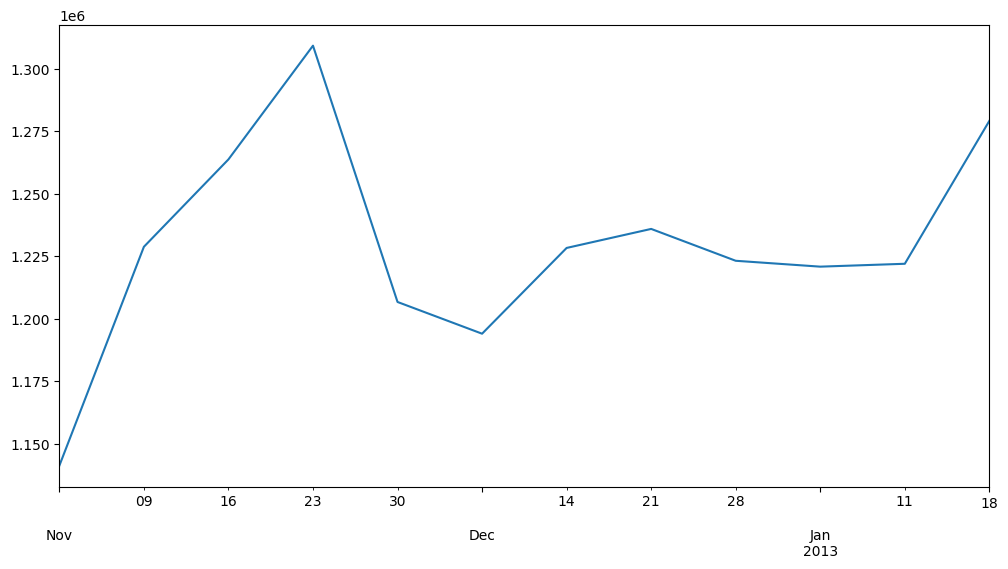

In [284]:
forecast_sarima4.plot()

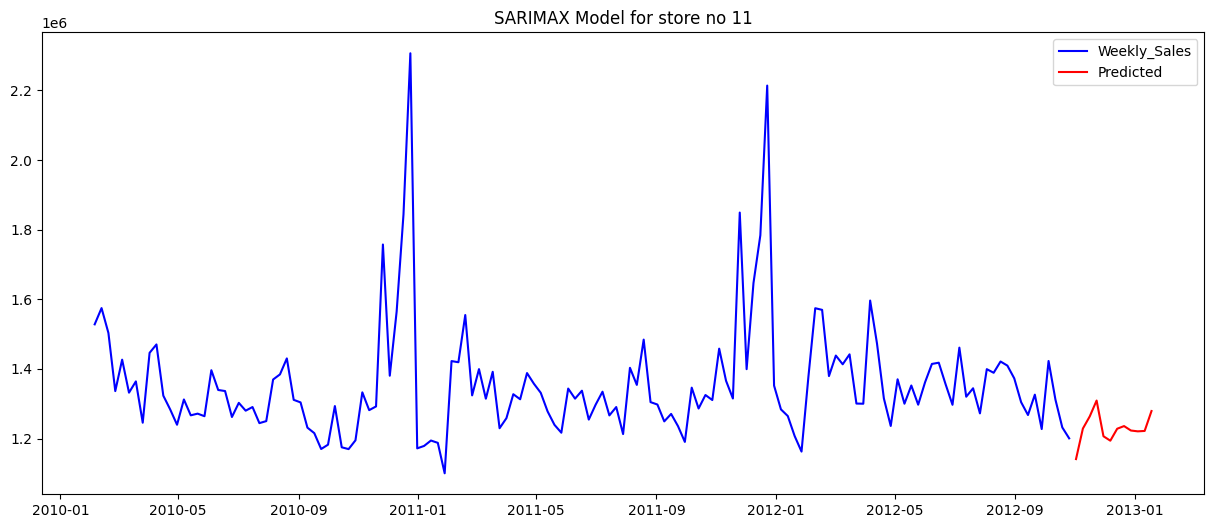

In [285]:
#sarima visualization
plt.figure(figsize=(15,6))
plt.plot(store_11_data,color='blue',label='Weekly_Sales')
plt.plot(forecast_sarima4,color='red',label='Predicted')
plt.title('SARIMAX Model for store no 11')
plt.legend()
plt.show()

### **The rationale behind applying parameters in second attempt of auto arima **

*   **Initial Attempt and its Limitations:**
In the first attempt with auto_arima for Store 11, the model was unable to identify a suitable ARIMA order that captured the underlying patterns in the data effectively.
*   **Second Attempt with Parameter Adjustments:**
To address the limitations of the initial attempt, parameters within auto_arima were adjusted in the second iteration. This adjustment allowed the model to explore a wider range of potential ARIMA orders, leading to the selection of a more suitable model that could better capture the data's characteristics.


### **The changes in auto_arima parameters aimed to accomplish the following:**


*   Improve Model Fit
*   Address Hidden Seasonality
*   Improve Forecast Accuracy



